In [247]:
cowsay.cow('Welcome! This is the very beginning of my project. From here you can see how I preprocess the raw data, setting up functions to plot and calculate WOE, IV for discrete / continuous variables. And do some humble analysis. Hope you enjoy.')

  _________________________________________________
 /                                                 \
| Welcome! This is the very beginning of my project |
| . From here you can see how I preprocess the raw  |
| data, setting up functions to plot and calculate  |
| WOE, IV for discrete / continuous variables. And  |
| do some humble analysis. Hope you enjoy.          |
 \                                                 /
                                                 \
                                                  \
                                                    ^__^
                                                    (oo)\_______
                                                    (__)\       )\/\
                                                        ||----w |
                                                        ||     ||


# Data Preparation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [4]:
loan_data_backup = pd.read_csv('loan_data_2007_2014_raw.csv') # index_col = 0
loan_data = loan_data_backup.copy()

In [6]:
loan_data.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
loan_data.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

In [7]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

# General Preprocessing

### Preprocessing continuous variables

In [24]:
# replace years, <, + signs
print(loan_data['emp_length'].unique())


# drop " months"
print(loan_data['term'].unique())

#  change from string to date variable
print(loan_data['earliest_cr_line'])

['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]
[' 36 months' ' 60 months']
0         Jan-85
1         Apr-99
2         Nov-01
3         Feb-96
4         Jan-96
           ...  
466280    Apr-03
466281    Jun-97
466282    Dec-01
466283    Feb-03
466284    Feb-00
Name: earliest_cr_line, Length: 466285, dtype: object


In [25]:
###################################### emp_length #########################################

# drop 'years', '+', '<' signs
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year', str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('n/a', str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' year', '')
# transform it to a numerical column
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'])
loan_data['emp_length_int'].fillna(value = 0, inplace = True)

######################################## term ##############################################
loan_data['term_int'] = loan_data['term'].str.replace(' months','')
loan_data['term_int'] = pd.to_numeric(loan_data['term_int'])

######################################## earliest_cr_line ###################################
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], format = '%b-%y')
pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']

loan_data['mnths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date'])/np.timedelta64(1,'M')))
# eliminate -612 months to be possible max month
loan_data.loc[: , ['earliest_cr_line', 'earliest_cr_line_date','mnths_since_earliest_cr_line']][loan_data['mnths_since_earliest_cr_line'] < 0]
# impute the negative values into 'max' months since earliest cr line
loan_data['mnths_since_earliest_cr_line'][loan_data['mnths_since_earliest_cr_line'] < 0] = loan_data['mnths_since_earliest_cr_line'].max()
loan_data['issue_d_date'] = pd.to_datetime(loan_data['issue_d'],format='%b-%y')
# Extracts the date and the time from a string variable that is in a given format.
loan_data['mnths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['issue_d_date'])/ np.timedelta64(1, 'M')))
# Calculate the difference between two dates in months, turn it to numeric datatype and round it.


### Preprocessing discrete variables

In [26]:
# will create dummy variable for all the categories.

loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 80 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   id                            466285 non-null  int64         
 1   member_id                     466285 non-null  int64         
 2   loan_amnt                     466285 non-null  int64         
 3   funded_amnt                   466285 non-null  int64         
 4   funded_amnt_inv               466285 non-null  float64       
 5   term                          466285 non-null  object        
 6   int_rate                      466285 non-null  float64       
 7   installment                   466285 non-null  float64       
 8   grade                         466285 non-null  object        
 9   sub_grade                     466285 non-null  object        
 10  emp_title                     438697 non-null  object        
 11  emp_length   

In [27]:
# get dummies and compile them into new df
pd.get_dummies(loan_data['grade'], prefix = 'grade',prefix_sep = ':')

loan_data_dummies = [pd.get_dummies(loan_data['grade'], prefix = 'grade',prefix_sep = ':'),
                     pd.get_dummies(loan_data['sub_grade'], prefix = 'sub_grade',prefix_sep = ':'),
                     pd.get_dummies(loan_data['home_ownership'], prefix = 'home_ownership',prefix_sep = ':'),
                     pd.get_dummies(loan_data['verification_status'], prefix = 'verification_status',prefix_sep = ':'),
                     pd.get_dummies(loan_data['loan_status'], prefix = 'loan_status',prefix_sep = ':'),
                     pd.get_dummies(loan_data['purpose'], prefix = 'purpose',prefix_sep = ':'),
                     pd.get_dummies(loan_data['addr_state'], prefix = 'addr_state',prefix_sep = ':'),
                     pd.get_dummies(loan_data['initial_list_status'], prefix = 'initial_list_status',prefix_sep = ':')]


# Concat it 

loan_data_dummies = pd.concat(loan_data_dummies, axis = 1) #axis = 0 is by rows, #axis = 1 is by columns

# the type of loan_data_dummies is pandas.core.frame.DataFrame


loan_data = pd.concat([loan_data, loan_data_dummies],axis =1)
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'addr_state:TX', 'addr_state:UT', 'addr_state:VA', 'addr_state:VT',
       'addr_state:WA', 'addr_state:WI', 'addr_state:WV', 'addr_state:WY',
       'initial_list_status:f', 'initial_list_status:w'],
      dtype='object', length=206)

### Check for missing values and clean

In [28]:
loan_data.isnull()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
466281,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
466282,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
466283,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [29]:
pd.options.display.max_rows = None
loan_data.isnull().sum()

# Focus on columns that are needed to perform analysis
# Annual_inc *annual income* Column is missing 4 values, etc


id                                                                      0
member_id                                                               0
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           27588
emp_length                                                          21008
home_ownership                                                          0
annual_inc                            

In [30]:
# remove all rows with missing value, OR impute missing variables to one feature.
pd.options.display.max_rows = 100
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'], inplace = True)

In [32]:
# fill annual income missing values with MEAN(annual income)
loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean(),inplace = True)

In [33]:
# fill with 0s on null
# ‘mths_since_earliest_cr_line’
# ‘acc_now_delinq’
# ‘total_acc’
# ‘pub_rec’
# ‘open_acc’
# ‘inq_last_6mths’
# ‘delinq_2yrs’
# ‘emp_length_int’
# fill the rest of columns' NaN with 0 
loan_data['mnths_since_earliest_cr_line'].fillna(0, inplace = True)
loan_data['acc_now_delinq'].fillna(0, inplace = True)
loan_data['total_acc'].fillna(0, inplace = True)
loan_data['pub_rec'].fillna(0, inplace = True)
loan_data['open_acc'].fillna(0, inplace = True)
loan_data['inq_last_6mths'].fillna(0, inplace = True)
loan_data['delinq_2yrs'].fillna(0, inplace = True)
loan_data['emp_length_int'].fillna(0, inplace = True)

# PD Model (Pre-setup)

In [34]:
# looking at values here, 'Charged off' and 'Default' is definitely defaulted. 

loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [35]:
loan_data['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [36]:
# See the percentage %% of categories
loan_data['loan_status'].value_counts() / loan_data['loan_status'].count()

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

In [37]:
# default indicator~~  
# np.where check if condition is true
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off',
                                                                'Default', 
                                                                'Does not meet the credit policy. Status:Charged Off',
                                                                'Late (31-120 days)']), 
                                                                0,1)# return 0 if True, return 1 if False
loan_data['good_bad']

0         1
1         0
2         1
3         1
4         1
         ..
466280    1
466281    0
466282    1
466283    1
466284    1
Name: good_bad, Length: 466285, dtype: int32

In [ ]:
loan_data.to_csv('loan_data_2007_2014_preprocessed.csv')

# Export for further use in P4.

### Splitting Data

In [38]:
# train, test, split
train_test_split(loan_data.drop('good_bad', axis = 1), loan_data['good_bad'])

[              id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
 262781  32098290   34701467      15000        15000          15000.0   
 112732   5780567    7212565       8325         8325           8325.0   
 403072  14578751   16641078      11250        11250          11250.0   
 312454  26169232   28642087       9300         9300           9300.0   
 194058   1578350    1847101      13150        13150          13150.0   
 ...          ...        ...        ...          ...              ...   
 23603     612022     784774       8650         8650           8650.0   
 269316  32489365   35102622       4000         4000           4000.0   
 303710  27591928   30095073       9600         9600           9600.0   
 432575  12428678   14440791      12000        12000          12000.0   
 326630  23975808   26348383      10000        10000          10000.0   
 
               term  int_rate  installment grade sub_grade  ... addr_state:TX  \
 262781   60 months     11.67       331.1

In [39]:
#  all sklearn functions that include some randomness contain a random_state parameter


loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data.drop('good_bad', axis=1), loan_data['good_bad'], test_size = 0.2, random_state = 42)

In [40]:
# train:test = 4:1 = 80% : 20%
loan_data_inputs_train.shape

(373028, 206)

In [41]:
loan_data_targets_train.shape

(373028,)

In [42]:
# for testing
loan_data_inputs_test.shape

(93257, 206)

In [43]:
loan_data_targets_test.shape

(93257,)

### Data Preparation

### >>>>>>> SEE THE END OF THIS NOTEBOOK FOR DETAIL  >>>>>>

In [146]:
# create a df for all preprocessing

################################## changes the values here ##################

########### BEFORE CHANGE -> Un-tag and run these
# df_inputs_prepr = loan_data_inputs_train
# df_targets_prepr = loan_data_targets_train

########### AFTER CHANGE -> tag above, un-tag these and run these
df_inputs_prepr = loan_data_inputs_test
df_targets_prepr = loan_data_targets_test

### >>>>>>>> ADDITIONAL STEP  ENDS >>>>>>>>>>>

## Preprocessing Discrete Variables: Automating Calculations

In [147]:
# define a function, it works for all columns that are needed to process similarly above.

def woe_discrete(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df],axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                 df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1) 
    df = df.iloc[:, [0, 1, 3]] # keep only 1,2,4 columns
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good'] # assign column names
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum() # calculate proportion of observation
    df['n_good'] = df['prop_good'] * df['n_obs'] # calculate good borrowers
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs'] # calculate bad borrowers
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum() # proportion of good from total (%)
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum() # proporation of bad from total (%)
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad']) # WoE
    df = df.sort_values(['WoE']) # Sort WoE
    df = df.reset_index(drop = True) # Reset Index
    df['diff_prop_good'] = df['prop_good'].diff().abs() # Diff in % of WoEs
    df['diff_WoE'] = df['WoE'].diff().abs() # Diff in % of WoEs
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE'] # Find Information Value
    df['IV'] = df['IV'].sum() # Find information value
    return df

In [148]:
df_grade = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)
df_grade

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,668,0.697605,0.007163,466.0,202.0,0.005610,0.019823,-1.262323,NaN,NaN,0.300551
1,F,2699,0.775472,0.028942,2093.0,606.0,0.025197,0.059470,-0.858767,0.077868,0.403556,0.300551
2,E,7145,0.805178,0.076616,5753.0,1392.0,0.069257,0.136605,-0.679261,0.029706,0.179506,0.300551
3,D,15390,0.844314,0.165028,12994.0,2396.0,0.156428,0.235132,-0.407554,0.039136,0.271707,0.300551
4,C,25048,0.882905,0.268591,22115.0,2933.0,0.266231,0.287831,-0.078010,0.038590,0.329543,0.300551
5,B,27199,0.923085,0.291656,25107.0,2092.0,0.302250,0.205299,0.386785,0.040181,0.464796,0.300551
6,A,15108,0.962338,0.162004,14539.0,569.0,0.175027,0.055839,1.142469,0.039252,0.755683,0.300551


## preprocessing Discrete Variables: Visualizing results

In [149]:
# plot a graph for all new dfs in the definition function above:

def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[: , 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize = (18,6))
    plt.plot(x,y, marker = 'o', linestyle = '--', color = 'k') # display dot for each variable, dash line, data color black
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)
    

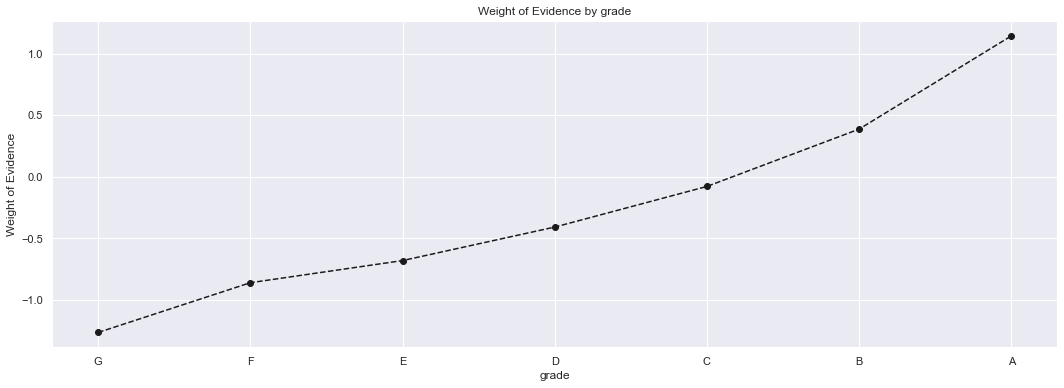

In [150]:
# Now PLOT!

plot_by_woe(df_grade,0)

## Preprocessing Discrete Variables: Creating Dummy Variables

#### Home_ownership column

In [151]:
df_ownership = woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)
df_ownership

# other and none have very low percentage in whole 'ownership' graph, and 'ANY' has only 1 observation
# we dont want dummies, but we dont want to remove them either
# So, we can combined underrepresented categories that are similar
# combine 'other','none,'rent','any' into a whole new dummy variable

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,OTHER,45,0.777778,0.000483,35.0,10.0,0.000421,0.000981,-0.845478,NaN,NaN,0.022938
1,NONE,10,0.800000,0.000107,8.0,2.0,0.000096,0.000196,-0.711946,0.022222,0.133531,0.022938
2,RENT,37874,0.874003,0.406125,33102.0,4772.0,0.398498,0.468302,-0.161412,0.074003,0.550534,0.022938
3,OWN,8409,0.888572,0.090170,7472.0,937.0,0.089951,0.091953,-0.022006,0.014568,0.139406,0.022938
4,MORTGAGE,46919,0.904751,0.503115,42450.0,4469.0,0.511033,0.438567,0.152922,0.016179,0.174928,0.022938


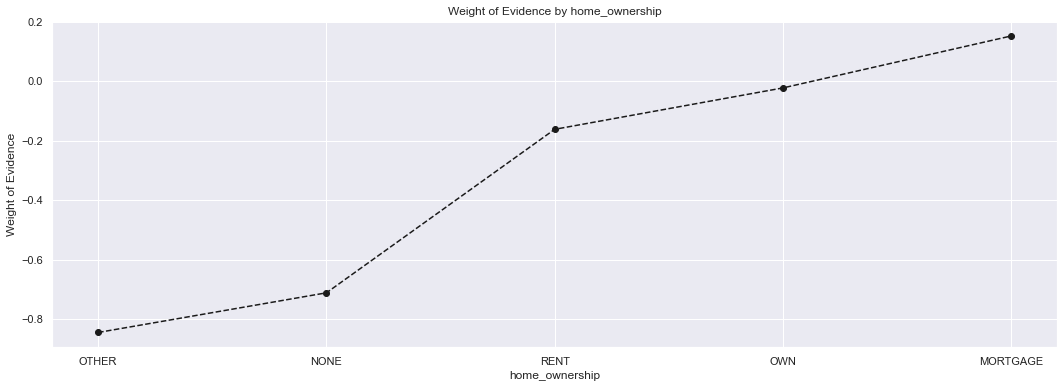

In [152]:
plot_by_woe(df_ownership)

In [153]:
# Create the dummy variable stated above
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'],
                                                             df_inputs_prepr['home_ownership:OTHER'],
                                                             df_inputs_prepr['home_ownership:NONE'],
                                                             df_inputs_prepr['home_ownership:ANY']])
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY']

362514    0
288564    0
213591    0
263083    0
165001    0
         ..
115       0
296284    1
61777     0
91763     0
167512    1
Name: home_ownership:RENT_OTHER_NONE_ANY, Length: 93257, dtype: uint8

#### addr_state column

In [154]:
df_inputs_prepr['addr_state'].unique()

array(['CA', 'IN', 'AZ', 'MI', 'PA', 'MO', 'CT', 'IL', 'SC', 'VA', 'NY',
       'FL', 'TX', 'NC', 'NM', 'NJ', 'KY', 'DE', 'OK', 'CO', 'OH', 'GA',
       'LA', 'WA', 'AL', 'TN', 'MD', 'NV', 'MN', 'RI', 'NH', 'MA', 'MS',
       'UT', 'WV', 'HI', 'KS', 'OR', 'WY', 'WI', 'AK', 'DC', 'AR', 'MT',
       'SD', 'VT', 'IA', 'ID', 'ME', 'NE'], dtype=object)

In [155]:
df_addr = woe_discrete(df_inputs_prepr, 'addr_state',df_targets_prepr)
df_addr

# Only 50 states contained in the data. Probably there is no brorrowers from one of the state
# The missing state is ND, North Dakota

,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,NE,1,0.000000,0.000011,0.0,1.0,0.000000,0.000098,-inf,NaN,NaN,inf
1,ID,2,0.500000,0.000021,1.0,1.0,0.000012,0.000098,-2.098241,0.500000,inf,inf
2,NV,1298,0.855932,0.013919,1111.0,187.0,0.013375,0.018351,-0.316333,0.355932,1.781907,inf
3,HI,486,0.860082,0.005211,418.0,68.0,0.005032,0.006673,-0.282267,0.004150,0.034067,inf
4,FL,6426,0.870059,0.068906,5591.0,835.0,0.067307,0.081943,-0.196759,0.009977,0.085508,inf
5,AL,1182,0.873096,0.012675,1032.0,150.0,0.012424,0.014720,-0.169622,0.003037,0.027137,inf
6,NJ,3676,0.875408,0.039418,3218.0,458.0,0.038740,0.044946,-0.148595,0.002312,0.021027,inf
7,LA,1130,0.876106,0.012117,990.0,140.0,0.011918,0.013739,-0.142178,0.000698,0.006416,inf
8,NY,8031,0.879965,0.086117,7067.0,964.0,0.085076,0.094603,-0.106141,0.003859,0.036038,inf
9,RI,403,0.880893,0.004321,355.0,48.0,0.004274,0.004711,-0.097324,0.000928,0.008817,inf


In [156]:
# Trying to check & add up ND in the missing state
if ['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND'] = 0

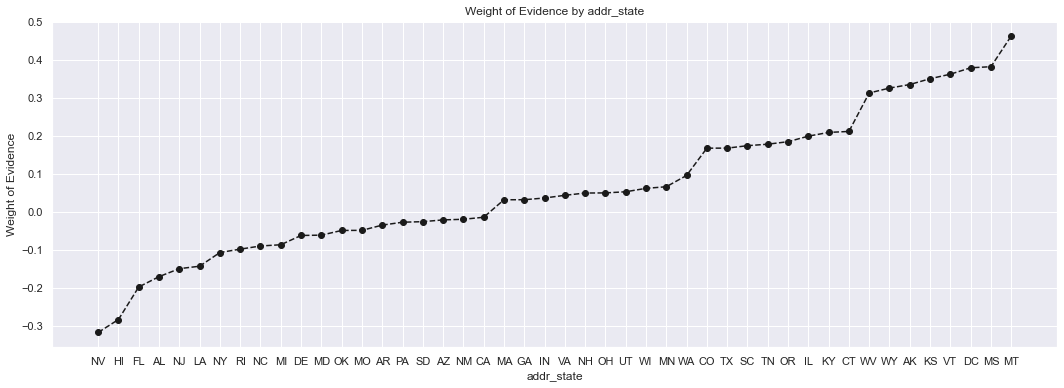

In [157]:
# NE, IA, NV, ME, ID has low observations, combine them into one or two category, 'low the worst' or 'high the best'
plot_by_woe(df_addr.iloc[2: -2, :])
# If we drop the worst 2 and the highest 2, we can see the chart to make more sense

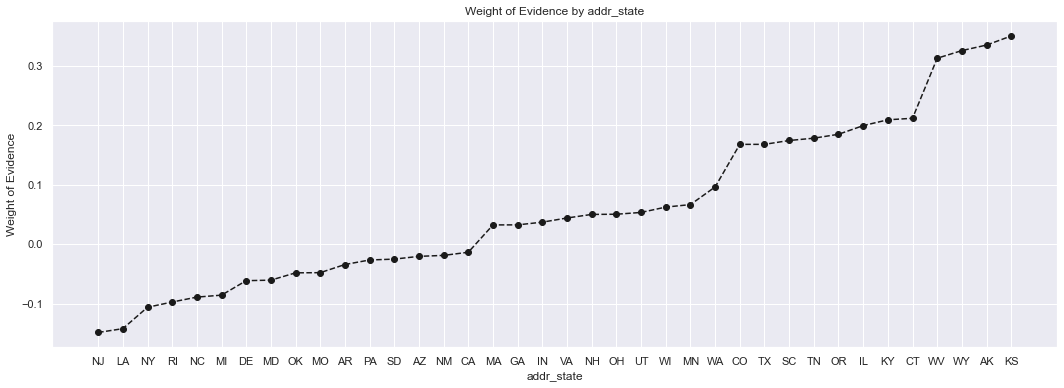

In [158]:
# when have no information, assume the worst case, so ND count in with NE and IA
plot_by_woe(df_addr.iloc[6:-6,:])

# NY and CA has many many observations,
# Those with many observations, need to be in a separate dummy variable by itself.
# In that case, CA, NY, any other states will be seperated in other groups

In [159]:
# process the address.

df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:ND'],
                                                         df_inputs_prepr['addr_state:NE'],
                                                         df_inputs_prepr['addr_state:IA'],
                                                         df_inputs_prepr['addr_state:NV'],
                                                         df_inputs_prepr['addr_state:FL'],
                                                         df_inputs_prepr['addr_state:HI'],
                                                         df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'],
                                          df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'],
                                                      df_inputs_prepr['addr_state:TN'],
                                                      df_inputs_prepr['addr_state:MO'],
                                                      df_inputs_prepr['addr_state:LA'],
                                                      df_inputs_prepr['addr_state:MD'],
                                                      df_inputs_prepr['addr_state:NC']])

df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'],
                                                df_inputs_prepr['addr_state:KY'],
                                                df_inputs_prepr['addr_state:AZ'],
                                                df_inputs_prepr['addr_state:NJ']])

df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'],
                                                    df_inputs_prepr['addr_state:MI'],
                                                    df_inputs_prepr['addr_state:PA'],
                                                    df_inputs_prepr['addr_state:OH'],
                                                    df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'],
                                                    df_inputs_prepr['addr_state:MA'],
                                                    df_inputs_prepr['addr_state:DE'],
                                                    df_inputs_prepr['addr_state:SD'],
                                                    df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'],
                                              df_inputs_prepr['addr_state:WA'],
                                              df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'],
                                          df_inputs_prepr['addr_state:MT']])

df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'],
                                          df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'],
                                                      df_inputs_prepr['addr_state:SC'],
                                                      df_inputs_prepr['addr_state:CO'],
                                                      df_inputs_prepr['addr_state:VT'],
                                                      df_inputs_prepr['addr_state:AK'],
                                                      df_inputs_prepr['addr_state:MS']])

df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'],
                                                      df_inputs_prepr['addr_state:NH'],
                                                      df_inputs_prepr['addr_state:WY'],
                                                      df_inputs_prepr['addr_state:DC'],
                                                      df_inputs_prepr['addr_state:ME'],
                                                      df_inputs_prepr['addr_state:ID']])

#### Verification_status column

In [160]:
df_inputs_prepr['verification_status'].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [161]:
df_veri = woe_discrete(df_inputs_prepr, 'verification_status',df_targets_prepr)
df_veri

,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Verified,33641,0.872031,0.360734,29336.0,4305.0,0.353161,0.422473,-0.179202,NaN,NaN,0.022684
1,Source Verified,29963,0.895738,0.321295,26839.0,3124.0,0.323101,0.306575,0.052501,0.023707,0.231704,0.022684
2,Not Verified,29653,0.906890,0.317971,26892.0,2761.0,0.323739,0.270952,0.177995,0.011152,0.125494,0.022684


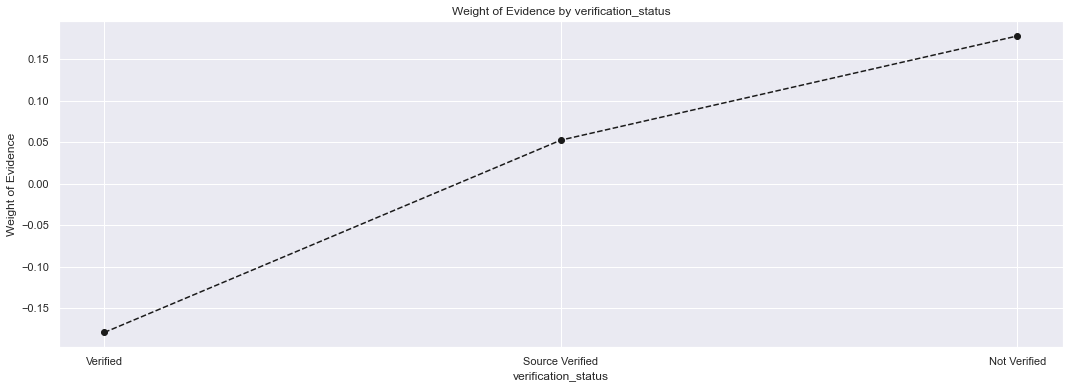

In [162]:
plot_by_woe(df_veri)

With different WoE values, 'verification_status' can be used as separate variable

#### Purpose column

In [163]:
df_inputs_prepr['purpose'].unique()

array(['home_improvement', 'credit_card', 'debt_consolidation',
       'vacation', 'house', 'medical', 'small_business', 'car', 'other',
       'major_purchase', 'wedding', 'moving', 'educational',
       'renewable_energy'], dtype=object)

In [164]:
df_purpose = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
df_purpose

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,educational,89,0.752809,0.000954,67.0,22.0,0.000807,0.002159,-0.984590,NaN,NaN,0.045124
1,renewable_energy,70,0.771429,0.000751,54.0,16.0,0.000650,0.001570,-0.881845,0.018620,0.102745,0.045124
2,small_business,1431,0.777079,0.015345,1112.0,319.0,0.013387,0.031305,-0.849516,0.005650,0.032329,0.045124
3,medical,918,0.857298,0.009844,787.0,131.0,0.009474,0.012856,-0.305210,0.080220,0.544307,0.045124
4,house,439,0.858770,0.004707,377.0,62.0,0.004539,0.006084,-0.293130,0.001471,0.012080,0.045124
5,other,4806,0.861007,0.051535,4138.0,668.0,0.049815,0.065554,-0.274561,0.002237,0.018569,0.045124
6,wedding,456,0.864035,0.004890,394.0,62.0,0.004743,0.006084,-0.249024,0.003028,0.025537,0.045124
7,moving,602,0.878738,0.006455,529.0,73.0,0.006368,0.007164,-0.117712,0.014702,0.131312,0.045124
8,vacation,496,0.881048,0.005319,437.0,59.0,0.005261,0.005790,-0.095845,0.002311,0.021867,0.045124
9,debt_consolidation,55012,0.885916,0.589897,48736.0,6276.0,0.586707,0.615898,-0.048556,0.004867,0.047289,0.045124


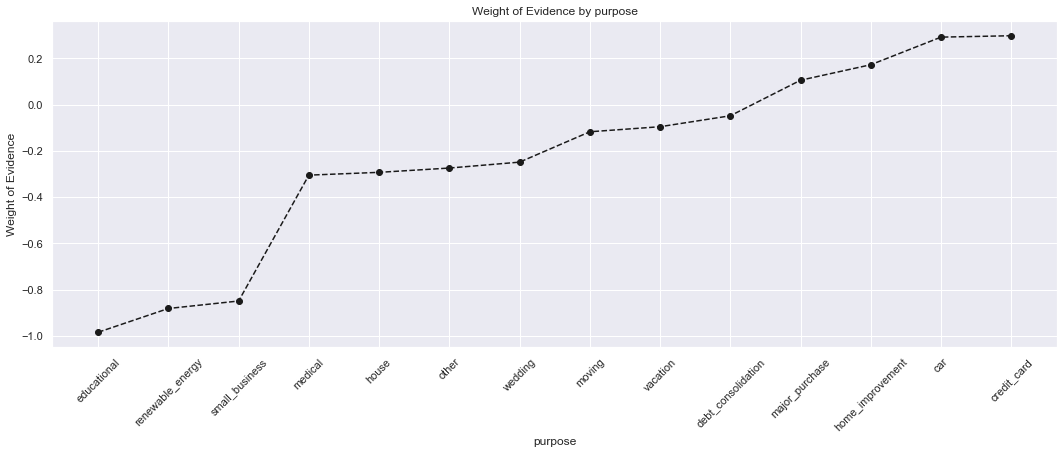

In [165]:
plot_by_woe(df_purpose,45)

We could combine some of the X variables together to form new categories, for the purpose of better measurement.

category 1  = small_business + educational + moving (WOEs too low)

category 2 = house + other + renewable_energy + medical (Similar WOEs around - 0.2)

category 3 = Wedding + vacation (Similar WOEs around -0.1)

category 4 = Debt_consolidation (Largest observation)

category 5 = home_improvement + major_purchase + car (Similar WOEs, 0 ~ 0.2)

category 6 = credit_card (Second Largest observation)


In [166]:

#cate 1
df_inputs_prepr['purpose:small_educ_moving'] = sum([df_inputs_prepr['purpose:small_business'],
                                                  df_inputs_prepr['purpose:educational'],
                                                  df_inputs_prepr['purpose:moving']])

# cate 2
df_inputs_prepr['purpose:house_other_renewable_medical'] = sum([df_inputs_prepr['purpose:house'],
                                                               df_inputs_prepr['purpose:other'],
                                                               df_inputs_prepr['purpose:renewable_energy'],
                                                               df_inputs_prepr['purpose:medical']])

# cate 3
df_inputs_prepr['purpose:wedding_vaca'] = sum([df_inputs_prepr['purpose:wedding'],
                                             df_inputs_prepr['purpose:vacation']])

# cate 5
df_inputs_prepr['purpose:improve_major_car'] = sum([df_inputs_prepr['purpose:home_improvement'],
                                                  df_inputs_prepr['purpose:major_purchase'],
                                                  df_inputs_prepr['purpose:car']])




#### Initial_list_status column

In [167]:
df_inputs_prepr['initial_list_status'].unique()

array(['f', 'w'], dtype=object)

In [168]:
df_initial = woe_discrete(df_inputs_prepr, 'initial_list_status',df_targets_prepr)
df_initial

,initial_list_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,f,60491,0.879685,0.648648,53213.0,7278.0,0.640603,0.71423,-0.108794,NaN,NaN,0.024888
1,w,32766,0.911127,0.351352,29854.0,2912.0,0.359397,0.28577,0.229238,0.031443,0.338032,0.024888


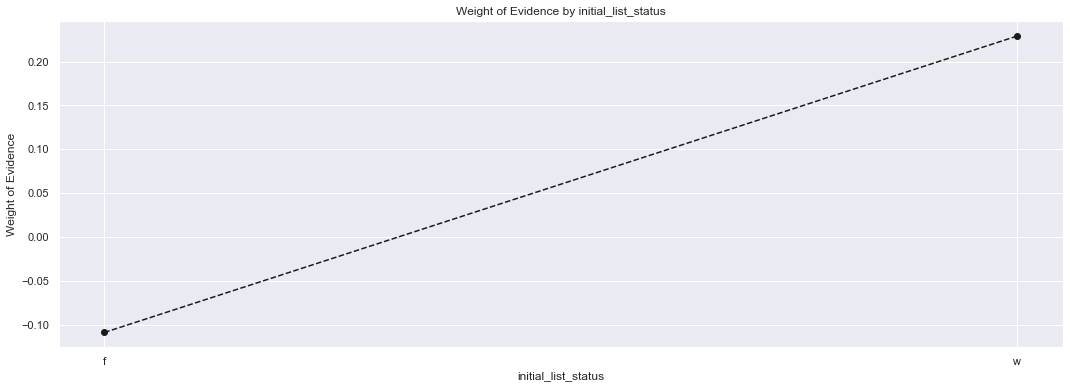

In [169]:
plot_by_woe(df_initial)

the variable has significantly different WOE values and categories should be kept as a separate variable

## Preprocessing Continuous Variables: Automating Claculations and Visualizing Results

In [170]:
# Copy pasted from woe_discrete with slight changes

def woe_ordered_continuous(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df],axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                 df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1) 
    df = df.iloc[:, [0, 1, 3]] 
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good'] 
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum() 
    df['n_good'] = df['prop_good'] * df['n_obs'] 
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs'] 
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum() 
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum() 
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad']) 
    ################# Continuous Variable we want them in Ascending/Descending Order, no need to sort them ############
    # df = df.sort_values(['WoE']) # Sort WoE
    # df = df.reset_index(drop = True) # Reset Index
    ################# And thus no index reset needed# #################################################################
    df['diff_prop_good'] = df['prop_good'].diff().abs() 
    df['diff_WoE'] = df['WoE'].diff().abs() 
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE'] 
    df['IV'] = df['IV'].sum() 
    return df

### Preprocessing Continuous Variables: Creating Dummy Variables

#### term_int column

In [171]:
df_inputs_prepr['term_int'].unique()

array([60, 36], dtype=int64)

In [172]:
df_term = woe_ordered_continuous(df_inputs_prepr, 'term_int', df_targets_prepr)
df_term

,term_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,36,67534,0.902597,0.724171,60956.0,6578.0,0.733817,0.645535,0.128181,NaN,NaN,0.036603
1,60,25723,0.859581,0.275829,22111.0,3612.0,0.266183,0.354465,-0.286427,0.043016,0.414608,0.036603


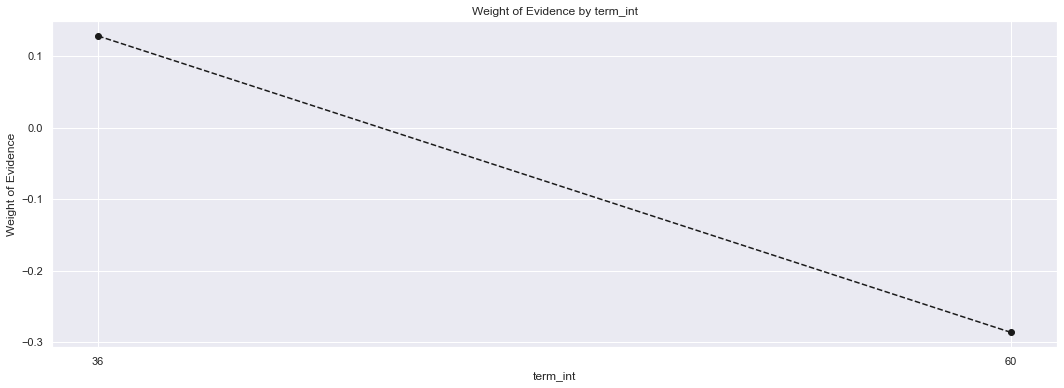

In [173]:
plot_by_woe(df_term)

We see 60 month is riskier than 36 months. 

Only thing we can do is to keep two categories of dummy variables for the term in the final model

Natually, 60 month category would be the reference category

In [174]:
# use np.where(condition, value if true, value if false)

# see and process term variable

df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term_int'] == 36), 1, 0)
df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term_int'] == 60), 1, 0)



#### Emp_length_int column

In [175]:
df_inputs_prepr['emp_length_int'].unique()

array([ 0., 10.,  1.,  2.,  9.,  3.,  6.,  4.,  7.,  8.,  5.])

In [176]:
# see and process employment length variable

df_length = woe_ordered_continuous(df_inputs_prepr, 'emp_length_int', df_targets_prepr)
df_length

,emp_length_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,11553,0.874491,0.123883,10103.0,1450.0,0.121625,0.142296,-0.156972,NaN,NaN,0.007766
1,1.0,5968,0.892594,0.063995,5327.0,641.0,0.064129,0.062905,0.019273,0.018102,0.176245,0.007766
2,2.0,8295,0.887402,0.088948,7361.0,934.0,0.088615,0.091658,-0.033766,0.005192,0.053039,0.007766
3,3.0,7391,0.889325,0.079254,6573.0,818.0,0.079129,0.080275,-0.014377,0.001923,0.019389,0.007766
4,4.0,5555,0.889469,0.059567,4941.0,614.0,0.059482,0.060255,-0.012913,0.000144,0.001465,0.007766
5,5.0,6172,0.886261,0.066183,5470.0,702.0,0.065850,0.068891,-0.045140,0.003208,0.032228,0.007766
6,6.0,5225,0.878852,0.056028,4592.0,633.0,0.055281,0.062120,-0.116640,0.007409,0.071500,0.007766
7,7.0,5131,0.893588,0.055020,4585.0,546.0,0.055196,0.053582,0.029686,0.014736,0.146326,0.007766
8,8.0,4542,0.890137,0.048704,4043.0,499.0,0.048672,0.048970,-0.006104,0.003451,0.035790,0.007766
9,9.0,3621,0.892847,0.038828,3233.0,388.0,0.038920,0.038077,0.021920,0.002711,0.028024,0.007766


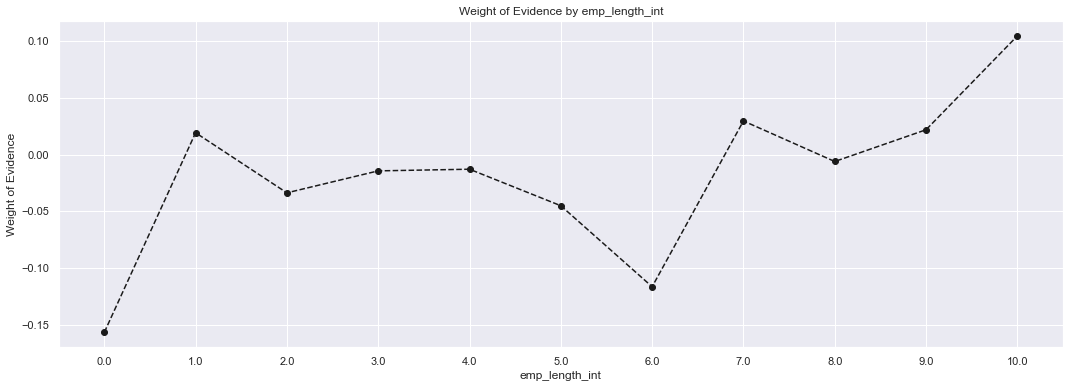

In [177]:
plot_by_woe(df_length)

cate1 = 0.0 riskiest, reference for the model

cate2 = 1.0

cate3 = 2~4

cate4 = 5~6

cate5 = 7~9 --> normally we prefer more details but we also want fewer dummies

cate6 = 10(or above)

In [178]:
# Now get the dummies setup

df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]), 1, 0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]), 1, 0)
df_inputs_prepr['emp_length:2-4'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2,5)), 1, 0)
df_inputs_prepr['emp_length:5-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(5,7)), 1, 0)
df_inputs_prepr['emp_length:7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7,10)), 1, 0)
df_inputs_prepr['emp_length:10+'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]), 1, 0)

#### mnths_since_issue_d column

In [179]:
df_inputs_prepr['mnths_since_issue_d'].unique()


array([ 41.,  38.,  66.,  37.,  58.,  50.,  86.,  51.,  48.,  59.,  72.,
        77.,  47.,  46.,  56.,  55., 119.,  63., 102.,  39.,  53.,  40.,
        52.,  43.,  49.,  57.,  45.,  36.,  54.,  74.,  44.,  73., 103.,
        70.,  95.,  89.,  68.,  82.,  71.,  76., 104.,  65.,  80.,  91.,
        75.,  67.,  42.,  61.,  64.,  60.,  85.,  88., 110.,  96.,  78.,
        83.,  69.,  90.,  62., 108.,  79.,  92., 118.,  99.,  81., 115.,
        97., 114., 116., 100.,  93., 117., 106., 124., 101., 125.,  87.,
        84.,  94., 105., 109.,  98., 107., 112., 113., 122., 111., 120.,
       121., 123., 126.])

In [180]:
# use pd.cut(Series, number of categories)

df_inputs_prepr['mnths_since_issue_d_factor'] = pd.cut(df_inputs_prepr['mnths_since_issue_d'], 50)
df_inputs_prepr['mnths_since_issue_d_factor']

362514     (39.6, 41.4]
288564     (37.8, 39.6]
213591     (64.8, 66.6]
263083    (35.91, 37.8]
165001     (57.6, 59.4]
              ...      
115        (70.2, 72.0]
296284     (37.8, 39.6]
61777      (48.6, 50.4]
91763      (50.4, 52.2]
167512     (57.6, 59.4]
Name: mnths_since_issue_d_factor, Length: 93257, dtype: category
Categories (50, interval[float64]): [(35.91, 37.8] < (37.8, 39.6] < (39.6, 41.4] < (41.4, 43.2] ... (118.8, 120.6] < (120.6, 122.4] < (122.4, 124.2] < (124.2, 126.0]]

In [181]:
df_mnth = woe_ordered_continuous(df_inputs_prepr, 'mnths_since_issue_d_factor', df_targets_prepr)
df_mnth

,mnths_since_issue_d_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(35.91, 37.8]",7191,0.945766,0.077109,6801.0,390.0,0.081874,0.038273,0.760438,NaN,NaN,0.126297
1,"(37.8, 39.6]",9752,0.930373,0.104571,9073.0,679.0,0.109225,0.066634,0.494196,0.015392,0.266241,0.126297
2,"(39.6, 41.4]",9506,0.919945,0.101933,8745.0,761.0,0.105276,0.074681,0.343363,0.010428,0.150833,0.126297
3,"(41.4, 43.2]",7240,0.909116,0.077635,6582.0,658.0,0.079237,0.064573,0.204648,0.010829,0.138715,0.126297
4,"(43.2, 45.0]",7217,0.902868,0.077388,6516.0,701.0,0.078443,0.068793,0.131267,0.006248,0.073381,0.126297
5,"(45.0, 46.8]",3104,0.895296,0.033284,2779.0,325.0,0.033455,0.031894,0.047781,0.007572,0.083487,0.126297
6,"(46.8, 48.6]",6197,0.890269,0.066451,5517.0,680.0,0.066416,0.066732,-0.004744,0.005027,0.052525,0.126297
7,"(48.6, 50.4]",5821,0.885930,0.062419,5157.0,664.0,0.062082,0.065162,-0.048413,0.004339,0.043669,0.126297
8,"(50.4, 52.2]",5021,0.878909,0.053840,4413.0,608.0,0.053126,0.059666,-0.116106,0.007022,0.067693,0.126297
9,"(52.2, 54.0]",4497,0.874138,0.048222,3931.0,566.0,0.047323,0.055545,-0.160186,0.004770,0.044080,0.126297


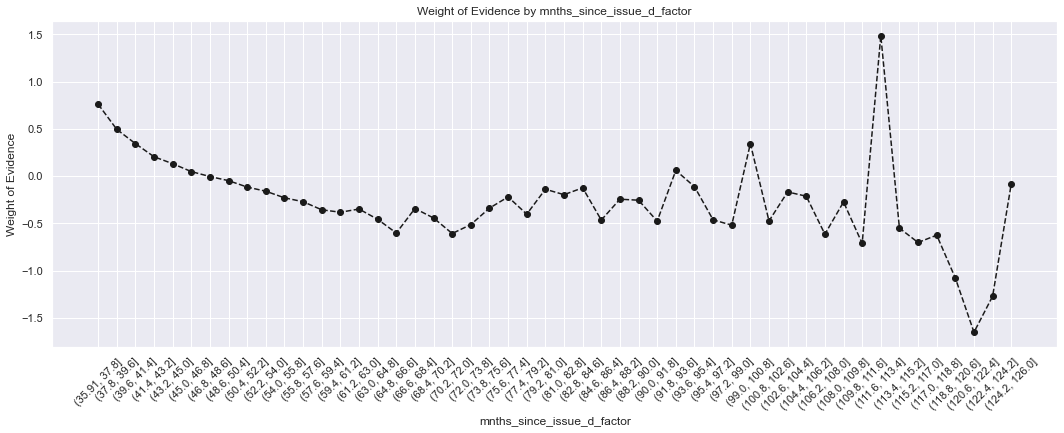

In [182]:
plot_by_woe(df_mnth, 45)

The variable only can have integers as 'months'

So our categories should divide using integers

cate1 = <38

cate2 = 38~39

cate3 = 39~41

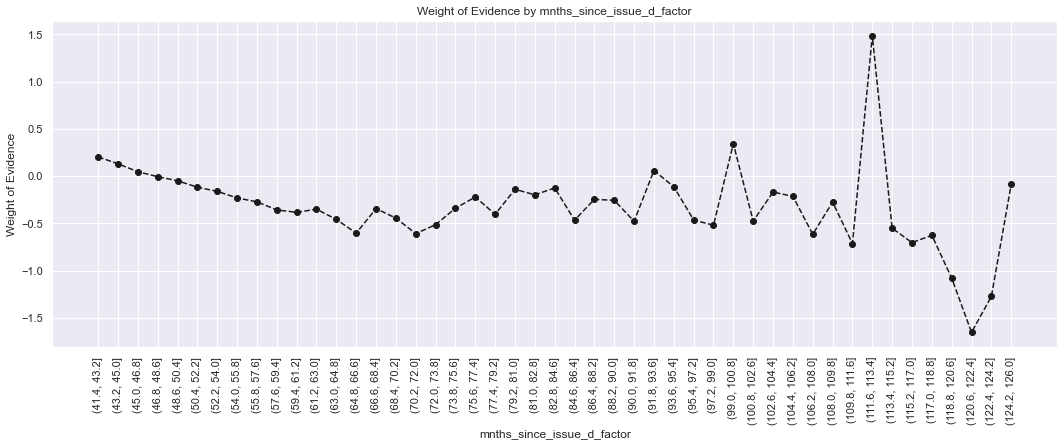

In [183]:
# except for the first 3, we plot again
plot_by_woe(df_mnth.iloc[3:, :], 90)

# we can continue making dummy categories using graph below

cate4 = 42~48

cate5 = 49~52

cate6 = 53~64

check number of observations, if you see fluctation very big for the woe graph

cate7 = 65 ~ 84

cate8 = >84

In [184]:
# Now create categories!

df_inputs_prepr['mnths_since_issue_d: < 38'] = np.where(df_inputs_prepr['mnths_since_issue_d'].isin(range(38)),1,0)
df_inputs_prepr['mnths_since_issue_d: 38~39'] = np.where(df_inputs_prepr['mnths_since_issue_d'].isin(range(38,40)),1,0)
df_inputs_prepr['mnths_since_issue_d: 40~41'] = np.where(df_inputs_prepr['mnths_since_issue_d'].isin(range(40,42)),1,0)
df_inputs_prepr['mnths_since_issue_d: 42~48'] = np.where(df_inputs_prepr['mnths_since_issue_d'].isin(range(42,49)),1,0)
df_inputs_prepr['mnths_since_issue_d: 49~52'] = np.where(df_inputs_prepr['mnths_since_issue_d'].isin(range(49,53)),1,0)
df_inputs_prepr['mnths_since_issue_d: 53~64'] = np.where(df_inputs_prepr['mnths_since_issue_d'].isin(range(53,65)),1,0)
df_inputs_prepr['mnths_since_issue_d: 65~84'] = np.where(df_inputs_prepr['mnths_since_issue_d'].isin(range(65,85)),1,0)
df_inputs_prepr['mnths_since_issue_d: > 84'] = np.where(df_inputs_prepr['mnths_since_issue_d'].isin(range(85, int(df_inputs_prepr['mnths_since_issue_d'].max()))),1,0)


### int_rate_factor column

In [185]:
# Try interest rate

df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)
df_rate = woe_ordered_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
df_rate

,int_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(5.399, 5.833]",198,0.969697,0.002123,192.0,6.0,0.002311,0.000589,1.367495,NaN,NaN,0.371465
1,"(5.833, 6.246]",2086,0.979866,0.022368,2044.0,42.0,0.024607,0.004122,1.786754,0.010169,0.419258,0.371465
2,"(6.246, 6.658]",1974,0.972138,0.021167,1919.0,55.0,0.023102,0.005397,1.453986,0.007728,0.332768,0.371465
3,"(6.658, 7.071]",477,0.951782,0.005115,454.0,23.0,0.005465,0.002257,0.884362,0.020356,0.569623,0.371465
4,"(7.071, 7.484]",804,0.981343,0.008621,789.0,15.0,0.009498,0.001472,1.864475,0.029561,0.980113,0.371465
5,"(7.484, 7.897]",3245,0.965485,0.034796,3133.0,112.0,0.037717,0.010991,1.233007,0.015858,0.631469,0.371465
6,"(7.897, 8.31]",2429,0.951009,0.026046,2310.0,119.0,0.027809,0.011678,0.867639,0.014477,0.365368,0.371465
7,"(8.31, 8.722]",1680,0.965476,0.018015,1622.0,58.0,0.019526,0.005692,1.232732,0.014468,0.365093,0.371465
8,"(8.722, 9.135]",2384,0.942114,0.025564,2246.0,138.0,0.027038,0.013543,0.691412,0.023362,0.541320,0.371465
9,"(9.135, 9.548]",1590,0.976730,0.017050,1553.0,37.0,0.018696,0.003631,1.638785,0.034615,0.947373,0.371465


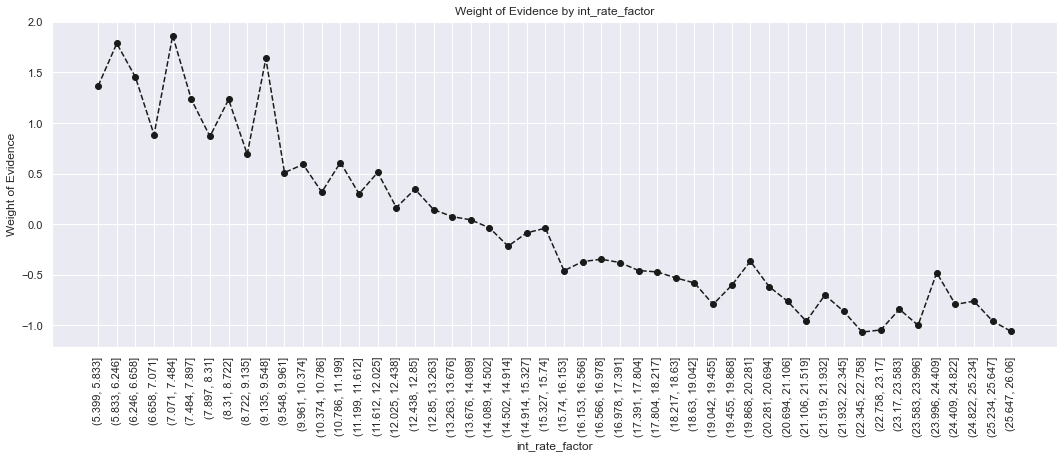

In [186]:
plot_by_woe(df_rate, 90)

The Greater the interest rate, the lower the weight of evidence, and higher the Prob of Default

cate1 = < 9.548

cate2 = 9.549~12.025

cate3 = 12.026~15.74

cate4 = 15.75~20.281

cate5 = > 20.281



In [187]:
# Apply categories!

df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548), 1, 0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74), 1, 0)
df_inputs_prepr['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281), 1, 0)
df_inputs_prepr['int_rate:>20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281), 1, 0)

#### funded_amnt_factor column

In [188]:
# use another one, Funded amount factor

df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'],50)
df_funded = woe_ordered_continuous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr)
# df_funded

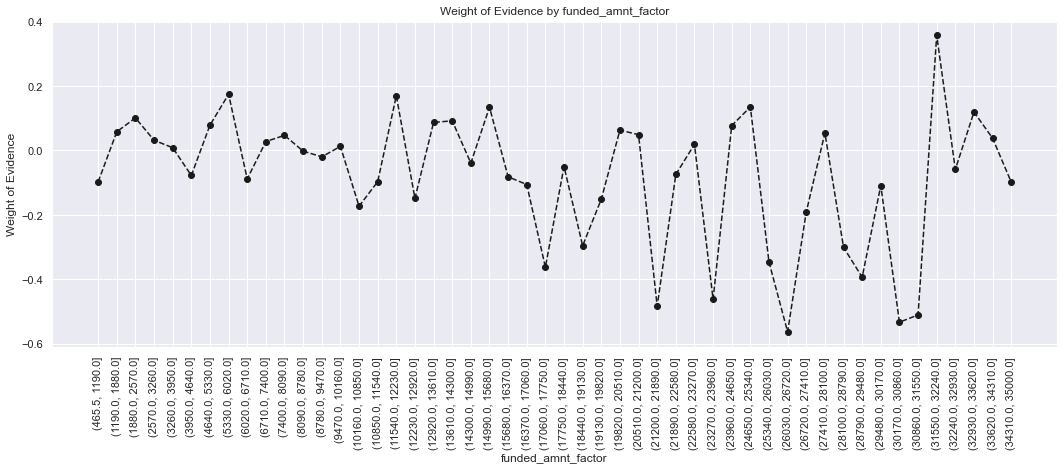

In [189]:
plot_by_woe(df_funded,90)

# plot is messed
# seems to have no clear relationship/association with the independent variable
# Make the decision: NOT TO USE FUNDED VARIABLE TO CREATE DUMMIES

plot is messed.

seems to have no clear relationship/association with the independent variable.

Make the decision: NOT TO USE FUNDED VARIABLE TO CREATE DUMMIES.

#### mnths_since_earliest_cr_line column

In [190]:
df_inputs_prepr['mnths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mnths_since_earliest_cr_line'],50)
df_earliest = woe_ordered_continuous(df_inputs_prepr, 'mnths_since_earliest_cr_line_factor', df_targets_prepr)
df_earliest


,mnths_since_earliest_cr_line_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.587, 11.74]",5,1.000000,0.000054,5.0,0.0,0.000060,0.000000,inf,NaN,NaN,inf
1,"(11.74, 23.48]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
2,"(23.48, 35.22]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
3,"(35.22, 46.96]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
4,"(46.96, 58.7]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
5,"(58.7, 70.44]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
6,"(70.44, 82.18]",182,0.923077,0.001952,168.0,14.0,0.002022,0.001374,0.386666,NaN,NaN,inf
7,"(82.18, 93.92]",508,0.913386,0.005447,464.0,44.0,0.005586,0.004318,0.257454,0.009691,0.129212,inf
8,"(93.92, 105.66]",715,0.851748,0.007667,609.0,106.0,0.007331,0.010402,-0.349861,0.061638,0.607316,inf
9,"(105.66, 117.4]",1268,0.854890,0.013597,1084.0,184.0,0.013050,0.018057,-0.324763,0.003141,0.025098,inf


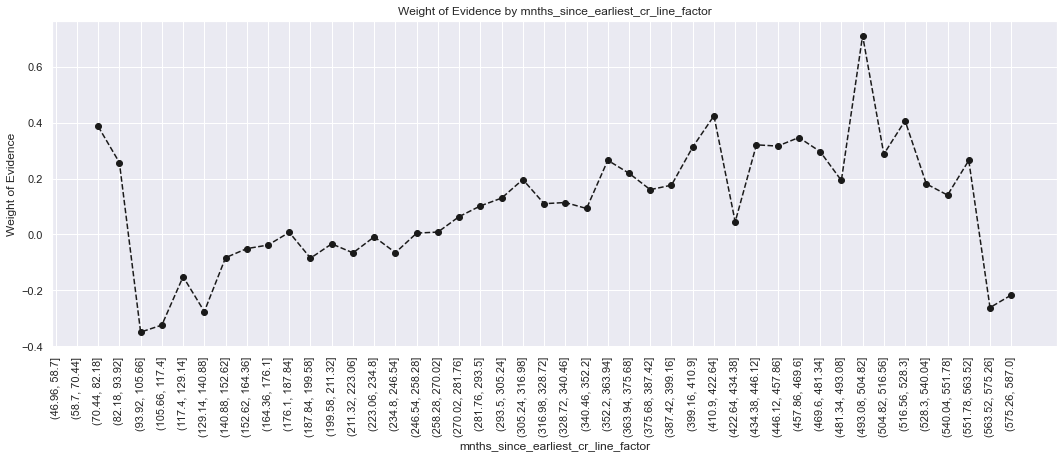

In [191]:
plot_by_woe(df_earliest,90)

Gotta make some categories.

cate1 = < 164.36

cate2 = 164.36~246.54

cate3 = 246.54~270.72

cate4 = 270.72~352.2

cate5 = 352.2~399.16

cate6 = > 399.16

In [192]:
# Now write the Code!

df_inputs_prepr['mnths_since_earliest_cr_line:<164.36'] = np.where((df_inputs_prepr['mnths_since_earliest_cr_line'] <= 164.36), 1, 0)
df_inputs_prepr['mnths_since_earliest_cr_line:164.36-246.54'] = np.where((df_inputs_prepr['mnths_since_earliest_cr_line'] > 164.36) & (df_inputs_prepr['mnths_since_earliest_cr_line'] <= 246.54), 1, 0)
df_inputs_prepr['mnths_since_earliest_cr_line:264.54-270.72'] = np.where((df_inputs_prepr['mnths_since_earliest_cr_line'] > 264.54) & (df_inputs_prepr['mnths_since_earliest_cr_line'] <= 270.72), 1, 0)
df_inputs_prepr['mnths_since_earliest_cr_line:270.72-352.2'] = np.where((df_inputs_prepr['mnths_since_earliest_cr_line'] > 270.72) & (df_inputs_prepr['mnths_since_earliest_cr_line'] <= 352.2), 1, 0)
df_inputs_prepr['mnths_since_earliest_cr_line:352.2-399.16'] = np.where((df_inputs_prepr['mnths_since_earliest_cr_line'] > 352.2) & (df_inputs_prepr['mnths_since_earliest_cr_line'] <= 399.16), 1, 0)
df_inputs_prepr['mnths_since_earliest_cr_line:>399.16'] = np.where((df_inputs_prepr['mnths_since_earliest_cr_line'] > 399.16), 1, 0)




#### Installment column

In [193]:
df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'],50)
df_install = woe_ordered_continuous(df_inputs_prepr, 'installment_factor', df_targets_prepr)
df_install

,installment_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(14.369, 43.585]",485,0.872165,0.005201,423.0,62.0,0.005092,0.006084,-0.178003,NaN,NaN,inf
1,"(43.585, 71.41]",1246,0.904494,0.013361,1127.0,119.0,0.013567,0.011678,0.149950,0.032329,0.327953,inf
2,"(71.41, 99.235]",1731,0.895436,0.018562,1550.0,181.0,0.018660,0.017763,0.049273,0.009058,0.100678,inf
3,"(99.235, 127.06]",2292,0.896597,0.024577,2055.0,237.0,0.024739,0.023258,0.061730,0.001161,0.012458,inf
4,"(127.06, 154.885]",2602,0.886241,0.027901,2306.0,296.0,0.027761,0.029048,-0.045330,0.010356,0.107061,inf
5,"(154.885, 182.71]",4133,0.897653,0.044318,3710.0,423.0,0.044663,0.041511,0.073174,0.011412,0.118505,inf
6,"(182.71, 210.535]",4109,0.905086,0.044061,3719.0,390.0,0.044771,0.038273,0.156823,0.007433,0.083648,inf
7,"(210.535, 238.36]",3730,0.901877,0.039997,3364.0,366.0,0.040497,0.035918,0.120012,0.003210,0.036811,inf
8,"(238.36, 266.185]",4660,0.899785,0.049969,4193.0,467.0,0.050477,0.045829,0.096602,0.002091,0.023410,inf
9,"(266.185, 294.01]",4975,0.888844,0.053347,4422.0,553.0,0.053234,0.054269,-0.019251,0.010941,0.115853,inf


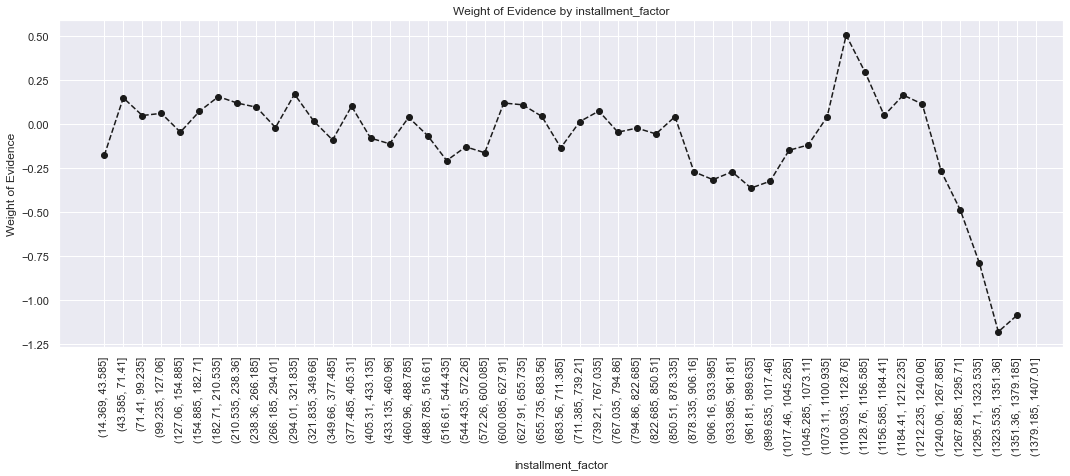

In [194]:
plot_by_woe(df_install,90)

Not good enough for observation.

#### delinq_2yrs column

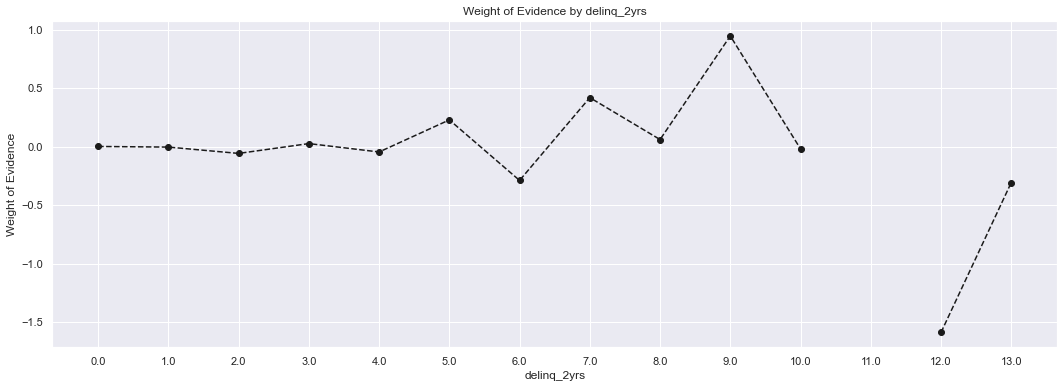

In [195]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'delinq_2yrs', df_targets_prepr)
plot_by_woe(df_temp)

In [196]:
# Categories: 0, 1-3, >=4
df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0), 1, 0)
df_inputs_prepr['delinq_2yrs:1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3), 1, 0)
df_inputs_prepr['delinq_2yrs:>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 9), 1, 0)

#### inq_last_6mnths column

In [197]:
df_last_6mths = woe_ordered_continuous(df_inputs_prepr, 'inq_last_6mths', df_targets_prepr)
df_last_6mths

,inq_last_6mths,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,48295,0.910094,0.517870,43953.0,4342.0,0.529127,0.426104,0.216545,NaN,NaN,inf
1,1.0,25985,0.882394,0.278639,22929.0,3056.0,0.276030,0.299902,-0.082945,0.027701,0.299490,inf
2,2.0,11611,0.861252,0.124505,10000.0,1611.0,0.120385,0.158096,-0.272511,0.021141,0.189566,inf
3,3.0,5086,0.846245,0.054537,4304.0,782.0,0.051814,0.076742,-0.392795,0.015008,0.120285,inf
4,4.0,1431,0.841370,0.015345,1204.0,227.0,0.014494,0.022277,-0.429786,0.004875,0.036991,inf
5,5.0,551,0.842105,0.005908,464.0,87.0,0.005586,0.008538,-0.424264,0.000736,0.005522,inf
6,6.0,211,0.763033,0.002263,161.0,50.0,0.001938,0.004907,-0.928859,0.079072,0.504595,inf
7,7.0,36,0.527778,0.000386,19.0,17.0,0.000229,0.001668,-1.987015,0.235255,1.058156,inf
8,8.0,21,0.523810,0.000225,11.0,10.0,0.000132,0.000981,-2.002930,0.003968,0.015915,inf
9,9.0,7,0.428571,0.000075,3.0,4.0,0.000036,0.000393,-2.385923,0.095238,0.382992,inf


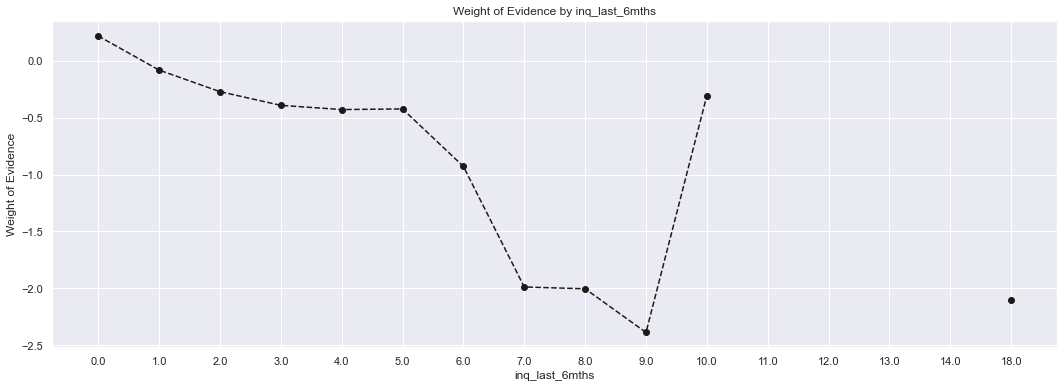

In [198]:
plot_by_woe(df_last_6mths)

In [199]:
# Categories: 0, 1 - 2, 3 - 6, > 6
df_inputs_prepr['inq_last_6mths:0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
df_inputs_prepr['inq_last_6mths:1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)
df_inputs_prepr['inq_last_6mths:3-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 3) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
df_inputs_prepr['inq_last_6mths:>6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6), 1, 0)

#### open_acc column

In [200]:
df_inputs_prepr['open_acc_factor'] = pd.cut(df_inputs_prepr['open_acc'],50)
df_open_acc = woe_ordered_continuous(df_inputs_prepr, 'open_acc_factor', df_targets_prepr)
df_open_acc

,open_acc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.061, 1.22]",39,0.897436,0.000418,35.0,4.0,0.000421,0.000393,0.070813,NaN,NaN,inf
1,"(1.22, 2.44]",334,0.838323,0.003582,280.0,54.0,0.003371,0.005299,-0.452435,0.059113,0.523248,inf
2,"(2.44, 3.66]",1122,0.852941,0.012031,957.0,165.0,0.011521,0.016192,-0.340383,0.014618,0.112052,inf
3,"(3.66, 4.88]",2560,0.892188,0.027451,2284.0,276.0,0.027496,0.027085,0.015042,0.039246,0.355425,inf
4,"(4.88, 6.1]",10619,0.891044,0.113868,9462.0,1157.0,0.113908,0.113543,0.003213,0.001143,0.011829,inf
5,"(6.1, 7.32]",7433,0.886856,0.079704,6592.0,841.0,0.079358,0.082532,-0.039220,0.004188,0.042433,inf
6,"(7.32, 8.54]",8314,0.893433,0.089151,7428.0,886.0,0.089422,0.086948,0.028054,0.006577,0.067275,inf
7,"(8.54, 9.76]",8768,0.888230,0.094020,7788.0,980.0,0.093756,0.096173,-0.025454,0.005203,0.053508,inf
8,"(9.76, 10.98]",8576,0.889109,0.091961,7625.0,951.0,0.091793,0.093327,-0.016567,0.000879,0.008887,inf
9,"(10.98, 12.2]",14626,0.890948,0.156835,13031.0,1595.0,0.156873,0.156526,0.002217,0.001838,0.018784,inf


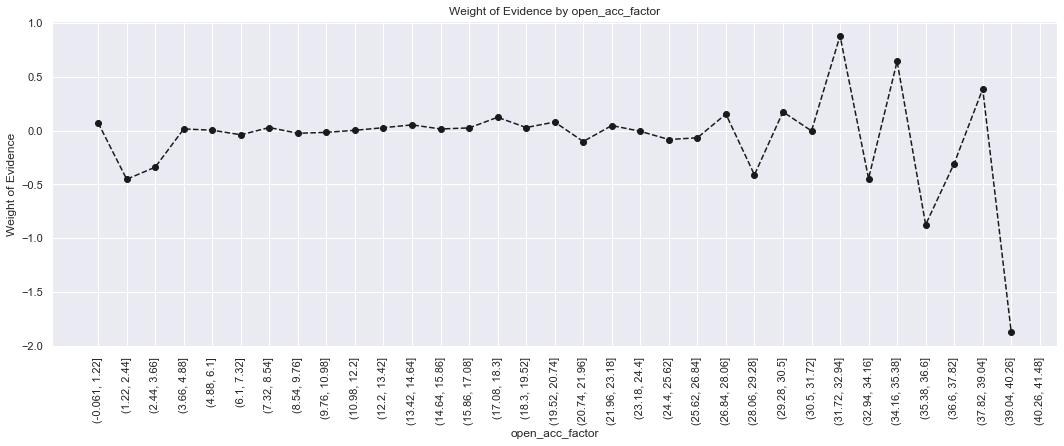

In [201]:
plot_by_woe(df_open_acc,90)

cate1 = < 5.04

cate2 = 5.04~15.12

cate3 = 15.12~23.52

cate4 = > 23.52

In [202]:
# Now write categories!!!

df_inputs_prepr['open_acc:<5.04'] = np.where((df_inputs_prepr['open_acc'] <= 5.04), 1, 0)
df_inputs_prepr['open_acc:5.04-15.12'] = np.where((df_inputs_prepr['open_acc'] > 5.04) & (df_inputs_prepr['open_acc'] <= 15.12), 1, 0)
df_inputs_prepr['open_acc:15.12-23.52'] = np.where((df_inputs_prepr['open_acc'] > 15.12) & (df_inputs_prepr['open_acc'] <= 23.52), 1, 0)
df_inputs_prepr['open_acc:>23.52'] = np.where((df_inputs_prepr['open_acc'] > 23.52), 1, 0)


#### pub_rec

In [203]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'pub_rec', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,pub_rec,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,80923,0.889179,0.867742,71955.0,8968.0,0.866228,0.880079,-0.015862,NaN,NaN,inf
1,1.0,10670,0.901125,0.114415,9615.0,1055.0,0.115750,0.103533,0.111543,0.011946,0.127405,inf
2,2.0,1097,0.904284,0.011763,992.0,105.0,0.011942,0.010304,0.147522,0.003160,0.035979,inf
3,3.0,331,0.900302,0.003549,298.0,33.0,0.003587,0.003238,0.102345,0.003982,0.045177,inf
4,4.0,112,0.857143,0.001201,96.0,16.0,0.001156,0.001570,-0.306481,0.043159,0.408826,inf
5,5.0,73,0.904110,0.000783,66.0,7.0,0.000795,0.000687,0.145504,0.046967,0.451985,inf
6,6.0,19,0.894737,0.000204,17.0,2.0,0.000205,0.000196,0.041825,0.009373,0.103678,inf
7,7.0,14,0.785714,0.000150,11.0,3.0,0.000132,0.000294,-0.798958,0.109023,0.840783,inf
8,8.0,5,0.800000,0.000054,4.0,1.0,0.000048,0.000098,-0.711946,0.014286,0.087011,inf
9,9.0,2,1.000000,0.000021,2.0,0.0,0.000024,0.000000,inf,0.200000,inf,inf


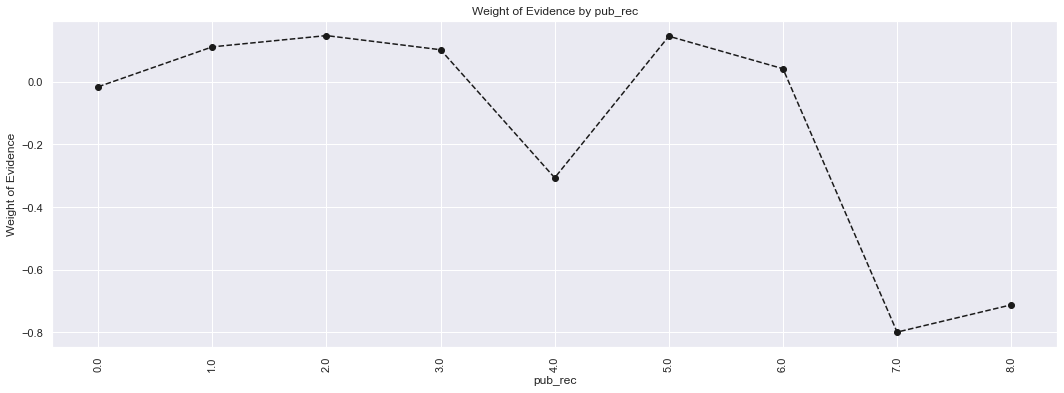

In [204]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [205]:
# Categories '0-2', '3-4', '>=5'
df_inputs_prepr['pub_rec:0-2'] = np.where((df_inputs_prepr['pub_rec'] >= 0) & (df_inputs_prepr['pub_rec'] <= 2), 1, 0)
df_inputs_prepr['pub_rec:3-4'] = np.where((df_inputs_prepr['pub_rec'] >= 3) & (df_inputs_prepr['pub_rec'] <= 4), 1, 0)
df_inputs_prepr['pub_rec:>=5'] = np.where((df_inputs_prepr['pub_rec'] >= 5), 1, 0)

#### total_acc columns

In [206]:
df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_acc_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,total_acc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.156, 3.12]",125,0.776000,0.001340,97.0,28.0,0.001168,0.002748,-0.855734,NaN,NaN,inf
1,"(3.12, 6.24]",1499,0.850567,0.016074,1275.0,224.0,0.015349,0.021982,-0.359185,0.074567,0.496549,inf
2,"(6.24, 9.36]",3715,0.871871,0.039836,3239.0,476.0,0.038993,0.046712,-0.180639,0.021304,0.178547,inf
3,"(9.36, 12.48]",6288,0.874841,0.067427,5501.0,787.0,0.066224,0.077233,-0.153784,0.002970,0.026855,inf
4,"(12.48, 15.6]",8289,0.888286,0.088883,7363.0,926.0,0.088639,0.090873,-0.024892,0.013445,0.128892,inf
5,"(15.6, 18.72]",9843,0.890176,0.105547,8762.0,1081.0,0.105481,0.106084,-0.005703,0.001890,0.019189,inf
6,"(18.72, 21.84]",10270,0.893866,0.110126,9180.0,1090.0,0.110513,0.106968,0.032609,0.003690,0.038312,inf
7,"(21.84, 24.96]",9971,0.892789,0.106920,8902.0,1069.0,0.107167,0.104907,0.021312,0.001077,0.011297,inf
8,"(24.96, 28.08]",11873,0.892108,0.127315,10592.0,1281.0,0.127512,0.125711,0.014217,0.000681,0.007094,inf
9,"(28.08, 31.2]",7289,0.892715,0.078160,6507.0,782.0,0.078334,0.076742,0.020538,0.000607,0.006321,inf


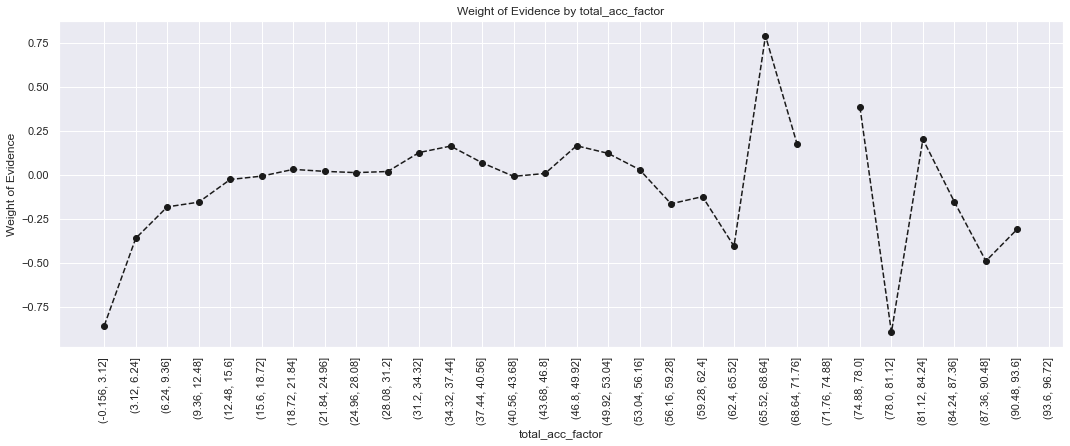

In [207]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [208]:
# Categories: '<=27', '28-51', '>51'
df_inputs_prepr['total_acc:<=27'] = np.where((df_inputs_prepr['total_acc'] <= 27), 1, 0)
df_inputs_prepr['total_acc:28-51'] = np.where((df_inputs_prepr['total_acc'] >= 28) & (df_inputs_prepr['total_acc'] <= 51), 1, 0)
df_inputs_prepr['total_acc:>=52'] = np.where((df_inputs_prepr['total_acc'] >= 52), 1, 0)

#### acc_now_delinq

In [209]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'acc_now_delinq', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,acc_now_delinq,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,92871,0.890827,0.995861,82732.0,10139.0,0.995967,0.994995,0.000976,NaN,NaN,0.000298
1,1.0,360,0.872222,0.003860,314.0,46.0,0.003780,0.004514,-0.177489,0.018605,0.178466,0.000298
2,2.0,22,0.818182,0.000236,18.0,4.0,0.000217,0.000393,-0.594163,0.054040,0.416674,0.000298
3,3.0,4,0.750000,0.000043,3.0,1.0,0.000036,0.000098,-0.999628,0.068182,0.405465,0.000298


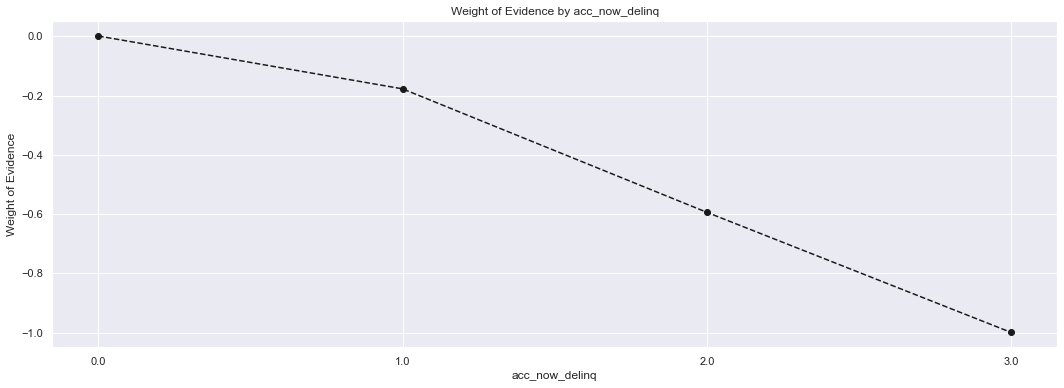

In [210]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [211]:
# Categories: '0', '>=1'
df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)

#### total_rev_hi_lim

In [212]:
df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'], 2000)
# Here we do fine-classing: using the 'cut' method, we split the variable into 2000 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_rev_hi_lim_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,total_rev_hi_lim_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-2013.133, 1006.566]",238,0.840336,0.002552,200.0,38.0,0.002408,0.003729,-0.437509,NaN,NaN,inf
1,"(1006.566, 2013.133]",678,0.827434,0.007270,561.0,117.0,0.006754,0.011482,-0.530694,0.012903,0.093184,inf
2,"(2013.133, 3019.7]",1121,0.852810,0.012021,956.0,165.0,0.011509,0.016192,-0.341428,0.025376,0.189265,inf
3,"(3019.7, 4026.266]",1461,0.878166,0.015666,1283.0,178.0,0.015445,0.017468,-0.123068,0.025356,0.218360,inf
4,"(4026.266, 5032.832]",2163,0.867776,0.023194,1877.0,286.0,0.022596,0.028067,-0.216802,0.010389,0.093735,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,"(2008100.168, 2009106.734]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1996,"(2009106.734, 2010113.301]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1997,"(2010113.301, 2011119.867]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1998,"(2011119.867, 2012126.434]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


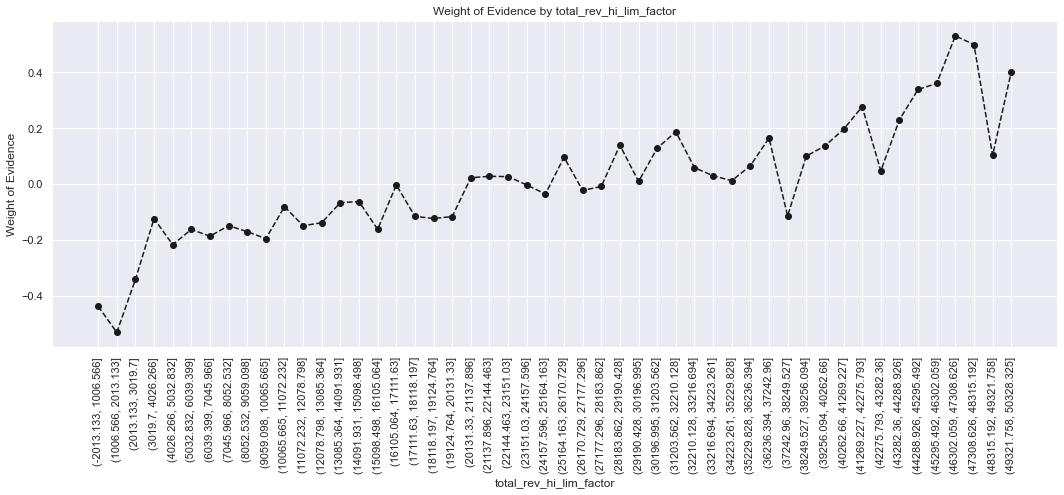

In [213]:
plot_by_woe(df_temp.iloc[: 50, : ], 90)
# We plot the weight of evidence values.

In [214]:
# Categories
# '<=5K', '5K-10K', '10K-20K', '20K-30K', '30K-40K', '40K-55K', '55K-95K', '>95K'
df_inputs_prepr['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

#### annual_inc column

This is a unique one.

In [215]:
# The very first observation is too large, 94% data. We could divide the variable into more than 50 classes on this one.

df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 100)
df_annual_inc = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
df_annual_inc

# fewer and fewer ppl have higher income.
# unbalanced observation

# we group people with higher than 140k into one category,
# then we can specify the rest

,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-2695.2, 79752.0]",62621,0.877932,0.671488,54977.0,7644.0,0.661839,0.750147,-0.125247,NaN,NaN,inf
1,"(79752.0, 154704.0]",26582,0.915206,0.285040,24328.0,2254.0,0.292872,0.221197,0.280681,0.037273,0.405928,inf
2,"(154704.0, 229656.0]",2916,0.926269,0.031268,2701.0,215.0,0.032516,0.021099,0.432499,0.011063,0.151818,inf
3,"(229656.0, 304608.0]",710,0.928169,0.007613,659.0,51.0,0.007933,0.005005,0.460657,0.001900,0.028159,inf
4,"(304608.0, 379560.0]",171,0.929825,0.001834,159.0,12.0,0.001914,0.001178,0.485757,0.001656,0.025100,inf
5,"(379560.0, 454512.0]",111,0.927928,0.001190,103.0,8.0,0.001240,0.000785,0.457047,0.001897,0.028710,inf
6,"(454512.0, 529464.0]",53,0.962264,0.000568,51.0,2.0,0.000614,0.000196,1.140438,0.034336,0.683391,inf
7,"(529464.0, 604416.0]",33,0.969697,0.000354,32.0,1.0,0.000385,0.000098,1.367495,0.007433,0.227057,inf
8,"(604416.0, 679368.0]",10,1.000000,0.000107,10.0,0.0,0.000120,0.000000,inf,0.030303,inf,inf
9,"(679368.0, 754320.0]",13,0.923077,0.000139,12.0,1.0,0.000144,0.000098,0.386666,0.076923,inf,inf


In [216]:
# set limits
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc'] <= 140000, :]

# then cut 50 categories again.
df_inputs_prepr_temp['annual_inc_factor'] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)
df_annual_lower140 = woe_ordered_continuous(df_inputs_prepr_temp, 'annual_inc_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# Now we have the lower 140k 
df_annual_lower140

,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(4664.8, 7504.0]",10,1.000000,0.000114,10.0,0.0,0.000128,0.000000,inf,NaN,NaN,inf
1,"(7504.0, 10208.0]",84,0.761905,0.000958,64.0,20.0,0.000822,0.002043,-0.911157,0.238095,inf,inf
2,"(10208.0, 12912.0]",123,0.780488,0.001403,96.0,27.0,0.001232,0.002758,-0.805796,0.018583,0.105361,inf
3,"(12912.0, 15616.0]",304,0.851974,0.003467,259.0,45.0,0.003325,0.004597,-0.324142,0.071486,0.481654,inf
4,"(15616.0, 18320.0]",383,0.827676,0.004368,317.0,66.0,0.004069,0.006743,-0.505060,0.024297,0.180919,inf
5,"(18320.0, 21024.0]",733,0.840382,0.008359,616.0,117.0,0.007907,0.011953,-0.413234,0.012706,0.091826,inf
6,"(21024.0, 23728.0]",704,0.846591,0.008028,596.0,108.0,0.007651,0.011034,-0.366198,0.006209,0.047036,inf
7,"(23728.0, 26432.0]",1785,0.861064,0.020356,1537.0,248.0,0.019730,0.025337,-0.250148,0.014474,0.116050,inf
8,"(26432.0, 29136.0]",1355,0.853137,0.015452,1156.0,199.0,0.014839,0.020331,-0.314891,0.007928,0.064743,inf
9,"(29136.0, 31840.0]",2292,0.854276,0.026137,1958.0,334.0,0.025134,0.034123,-0.305769,0.001139,0.009122,inf


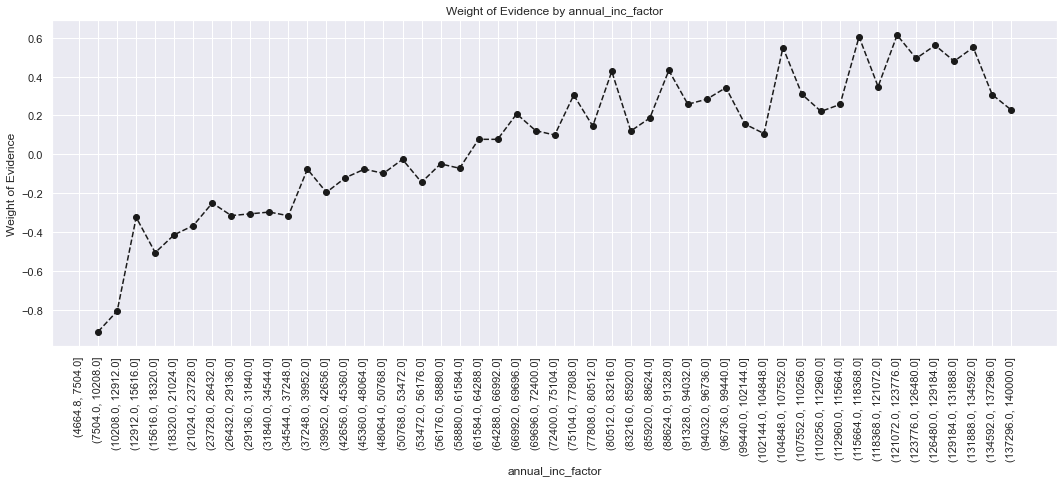

In [217]:
# plot the new graph using new df
plot_by_woe(df_annual_lower140, 90)

The Greater the annual income, the higher the weight of evidence, and lower the Prob of Default


In [218]:
# < 20k
# 20-30k
# 30-40k
# ....
# ....
# 90-100k
# 100-120k
# 120-140k
# > 140k

df_inputs_prepr['annual_inc:<20k'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
df_inputs_prepr['annual_inc: 20k-30k'] = np.where((df_inputs_prepr['annual_inc'] > 20000)& (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
df_inputs_prepr['annual_inc: 30k-40k'] = np.where((df_inputs_prepr['annual_inc'] > 30000)& (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
df_inputs_prepr['annual_inc: 40k-50k'] = np.where((df_inputs_prepr['annual_inc'] > 40000)& (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
df_inputs_prepr['annual_inc: 50k-60k'] = np.where((df_inputs_prepr['annual_inc'] > 50000)& (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
df_inputs_prepr['annual_inc: 60k-70k'] = np.where((df_inputs_prepr['annual_inc'] > 60000)& (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
df_inputs_prepr['annual_inc: 70k-80k'] = np.where((df_inputs_prepr['annual_inc'] > 70000)& (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
df_inputs_prepr['annual_inc: 80k-90k'] = np.where((df_inputs_prepr['annual_inc'] > 80000)& (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
df_inputs_prepr['annual_inc: 90k-100k'] = np.where((df_inputs_prepr['annual_inc'] > 90000)& (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
df_inputs_prepr['annual_inc: 100k-120k'] = np.where((df_inputs_prepr['annual_inc'] > 100000)& (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc: 120k-140k'] = np.where((df_inputs_prepr['annual_inc'] > 120000)& (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
df_inputs_prepr['annual_inc:>140k'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)

#### process delinq_since_last_time column

In [219]:
# if there is missing value, we consider it as 1
# if there is not missing value, we consider it as 0
# use temp df to store every non-null values from delinq into the df

# pd.notnull(df or Series)
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
df_delinq_last = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_delinq_last

,mths_since_last_delinq_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.17, 3.4]",1348,0.868694,0.031283,1171.0,177.0,0.030501,0.037668,-0.211036,NaN,NaN,inf
1,"(3.4, 6.8]",1890,0.880423,0.043861,1664.0,226.0,0.043342,0.048095,-0.104055,0.011729,0.106981,inf
2,"(6.8, 10.2]",3373,0.887044,0.078276,2992.0,381.0,0.077933,0.081081,-0.039601,0.006621,0.064453,inf
3,"(10.2, 13.6]",2496,0.895833,0.057924,2236.0,260.0,0.058241,0.055331,0.051263,0.008789,0.090864,inf
4,"(13.6, 17.0]",3165,0.884044,0.073449,2798.0,367.0,0.072880,0.078102,-0.069201,0.011789,0.120464,inf
5,"(17.0, 20.4]",2282,0.893076,0.052958,2038.0,244.0,0.053084,0.051926,0.022057,0.009032,0.091258,inf
6,"(20.4, 23.8]",2115,0.898345,0.049082,1900.0,215.0,0.049489,0.045754,0.078472,0.005269,0.056415,inf
7,"(23.8, 27.2]",2755,0.895463,0.063934,2467.0,288.0,0.064258,0.061290,0.047298,0.002882,0.031174,inf
8,"(27.2, 30.6]",1929,0.896319,0.044766,1729.0,200.0,0.045035,0.042562,0.056482,0.000857,0.009183,inf
9,"(30.6, 34.0]",2453,0.891969,0.056926,2188.0,265.0,0.056991,0.056395,0.010514,0.004350,0.045968,inf


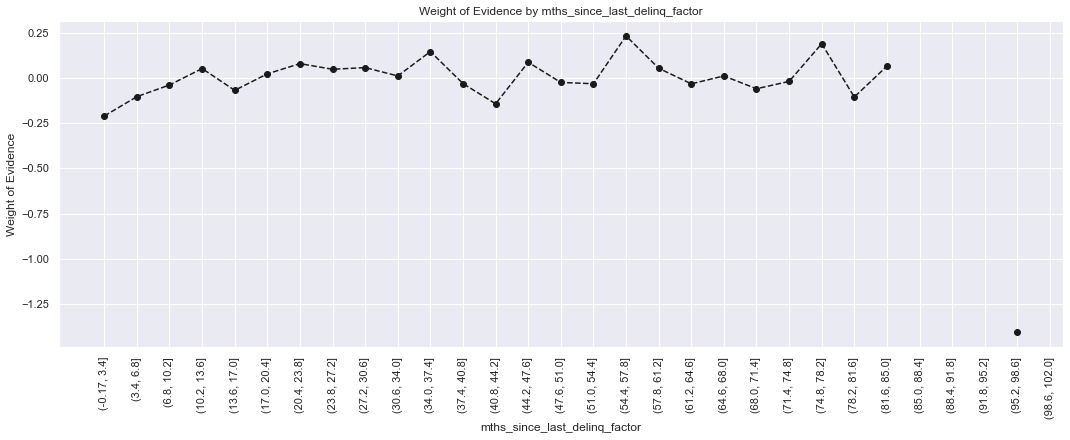

In [220]:
plot_by_woe(df_delinq_last,90)

cate1 = 0-3

cate2 = 3-31

cate3 = 31-56

cate4 = 56-86

cate5 = > 86


In [221]:
# now do the categories

df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] <= 56), 1, 0)
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)

### Homework Starts

#### DTI (Debt to Income Ratio) column

In [222]:
df_inputs_prepr['dti_factor'] = pd.cut(df_inputs_prepr['dti'], 100)
df_dti = woe_ordered_continuous(df_inputs_prepr, 'dti_factor', df_targets_prepr)
df_dti

# No need to further cut

,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.04, 0.4]",187,0.893048,0.002005,167.0,20.0,0.002010,0.001963,0.024021,NaN,NaN,0.038146
1,"(0.4, 0.8]",184,0.880435,0.001973,162.0,22.0,0.001950,0.002159,-0.101687,0.012613,0.125708,0.038146
2,"(0.8, 1.2]",223,0.892377,0.002391,199.0,24.0,0.002396,0.002355,0.017010,0.011942,0.118697,0.038146
3,"(1.2, 1.6]",255,0.905882,0.002734,231.0,24.0,0.002781,0.002355,0.166123,0.013506,0.149113,0.038146
4,"(1.6, 2.0]",315,0.892063,0.003378,281.0,34.0,0.003383,0.003337,0.013753,0.013819,0.152370,0.038146
5,"(2.0, 2.399]",324,0.913580,0.003474,296.0,28.0,0.003563,0.002748,0.259914,0.021517,0.246161,0.038146
6,"(2.399, 2.799]",366,0.918033,0.003925,336.0,30.0,0.004045,0.002944,0.317673,0.004453,0.057759,0.038146
7,"(2.799, 3.199]",442,0.907240,0.004740,401.0,41.0,0.004827,0.004024,0.182149,0.010793,0.135524,0.038146
8,"(3.199, 3.599]",484,0.933884,0.005190,452.0,32.0,0.005441,0.003140,0.549706,0.026644,0.367557,0.038146
9,"(3.599, 3.999]",563,0.902309,0.006037,508.0,55.0,0.006116,0.005397,0.124908,0.031575,0.424798,0.038146


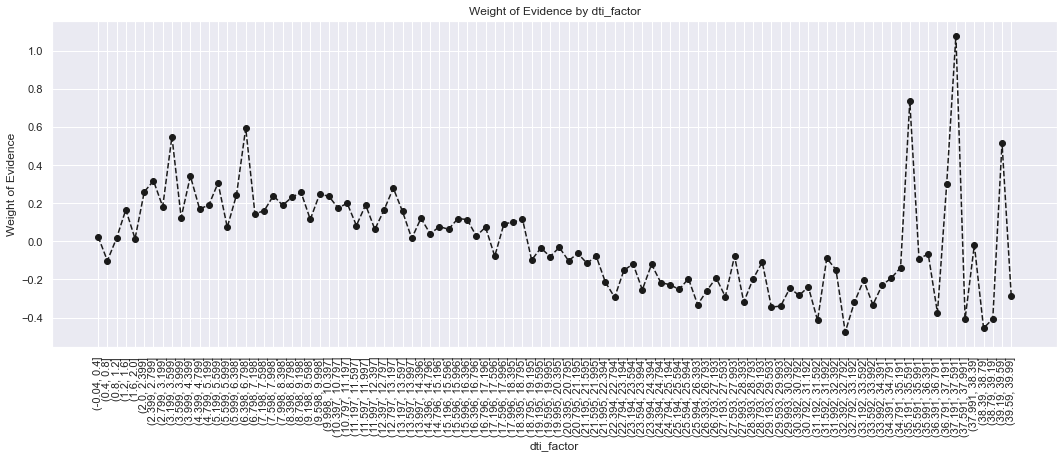

In [223]:
plot_by_woe(df_dti, 90)

In [224]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['dti'] <= 35, : ]

df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp['dti'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_dti_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'dti_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_dti_temp

,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.035, 0.7]",328,0.884146,0.003544,290.0,38.0,0.003518,0.003758,-0.066005,NaN,NaN,0.033919
1,"(0.7, 1.4]",393,0.903308,0.004246,355.0,38.0,0.004306,0.003758,0.136232,0.019162,0.202237,0.033919
2,"(1.4, 2.1]",536,0.895522,0.005792,480.0,56.0,0.005823,0.005538,0.050135,0.007785,0.086097,0.033919
3,"(2.1, 2.8]",607,0.915980,0.006559,556.0,51.0,0.006745,0.005044,0.290643,0.020458,0.240508,0.033919
4,"(2.8, 3.5]",811,0.924784,0.008763,750.0,61.0,0.009098,0.006032,0.410900,0.008804,0.120257,0.033919
5,"(3.5, 4.2]",970,0.903093,0.010481,876.0,94.0,0.010626,0.009296,0.133772,0.021691,0.277128,0.033919
6,"(4.2, 4.9]",1140,0.913158,0.012318,1041.0,99.0,0.012628,0.009790,0.254518,0.010065,0.120746,0.033919
7,"(4.9, 5.6]",1370,0.911679,0.014803,1249.0,121.0,0.015151,0.011966,0.236009,0.001479,0.018509,0.033919
8,"(5.6, 6.3]",1491,0.904762,0.016111,1349.0,142.0,0.016364,0.014043,0.152992,0.006917,0.083016,0.033919
9,"(6.3, 7.0]",1722,0.926829,0.018607,1596.0,126.0,0.019360,0.012460,0.440674,0.022067,0.287682,0.033919


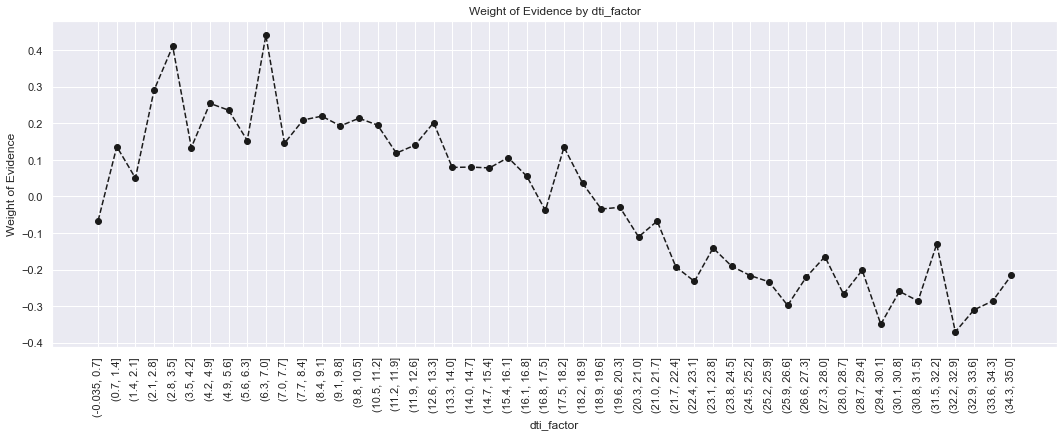

In [225]:
plot_by_woe(df_dti_temp, 90)

In [226]:
# Categories:
df_inputs_prepr['dti:<=1.4'] = np.where((df_inputs_prepr['dti'] <= 1.4), 1, 0)
df_inputs_prepr['dti:1.4-3.5'] = np.where((df_inputs_prepr['dti'] > 1.4) & (df_inputs_prepr['dti'] <= 3.5), 1, 0)
df_inputs_prepr['dti:3.5-7.7'] = np.where((df_inputs_prepr['dti'] > 3.5) & (df_inputs_prepr['dti'] <= 7.7), 1, 0)
df_inputs_prepr['dti:7.7-10.5'] = np.where((df_inputs_prepr['dti'] > 7.7) & (df_inputs_prepr['dti'] <= 10.5), 1, 0)
df_inputs_prepr['dti:10.5-16.1'] = np.where((df_inputs_prepr['dti'] > 10.5) & (df_inputs_prepr['dti'] <= 16.1), 1, 0)
df_inputs_prepr['dti:16.1-20.3'] = np.where((df_inputs_prepr['dti'] > 16.1) & (df_inputs_prepr['dti'] <= 20.3), 1, 0)
df_inputs_prepr['dti:20.3-21.7'] = np.where((df_inputs_prepr['dti'] > 20.3) & (df_inputs_prepr['dti'] <= 21.7), 1, 0)
df_inputs_prepr['dti:21.7-22.4'] = np.where((df_inputs_prepr['dti'] > 21.7) & (df_inputs_prepr['dti'] <= 22.4), 1, 0)
df_inputs_prepr['dti:22.4-35'] = np.where((df_inputs_prepr['dti'] > 22.4) & (df_inputs_prepr['dti'] <= 35), 1, 0)
df_inputs_prepr['dti:>35'] = np.where((df_inputs_prepr['dti'] > 35), 1, 0)

#### mths_since_last_record column

In [227]:
# We have to create one category for missing values and do fine and coarse classing for the rest.
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]
#sum(loan_data_temp['mths_since_last_record'].isnull())
df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_mths_since_last = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_record_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_mths_since_last

,mths_since_last_record_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.129, 2.58]",244,0.741803,0.019410,181.0,63.0,0.016036,0.049065,-1.118309,NaN,NaN,inf
1,"(2.58, 5.16]",36,0.888889,0.002864,32.0,4.0,0.002835,0.003115,-0.094230,0.147086,1.024079,inf
2,"(5.16, 7.74]",39,0.923077,0.003102,36.0,3.0,0.003190,0.002336,0.311235,0.034188,0.405465,inf
3,"(7.74, 10.32]",66,0.939394,0.005250,62.0,4.0,0.005493,0.003115,0.567169,0.016317,0.255933,inf
4,"(10.32, 12.9]",42,0.833333,0.003341,35.0,7.0,0.003101,0.005452,-0.564234,0.106061,1.131402,inf
5,"(12.9, 15.48]",69,0.869565,0.005489,60.0,9.0,0.005316,0.007009,-0.276551,0.036232,0.287682,inf
6,"(15.48, 18.06]",95,0.863158,0.007557,82.0,13.0,0.007265,0.010125,-0.331902,0.006407,0.055350,inf
7,"(18.06, 20.64]",58,0.965517,0.004614,56.0,2.0,0.004961,0.001558,1.158533,0.102359,1.490435,inf
8,"(20.64, 23.22]",101,0.891089,0.008034,90.0,11.0,0.007974,0.008567,-0.071757,0.074428,1.230290,inf
9,"(23.22, 25.8]",94,0.946809,0.007478,89.0,5.0,0.007885,0.003894,0.705527,0.055719,0.777284,inf


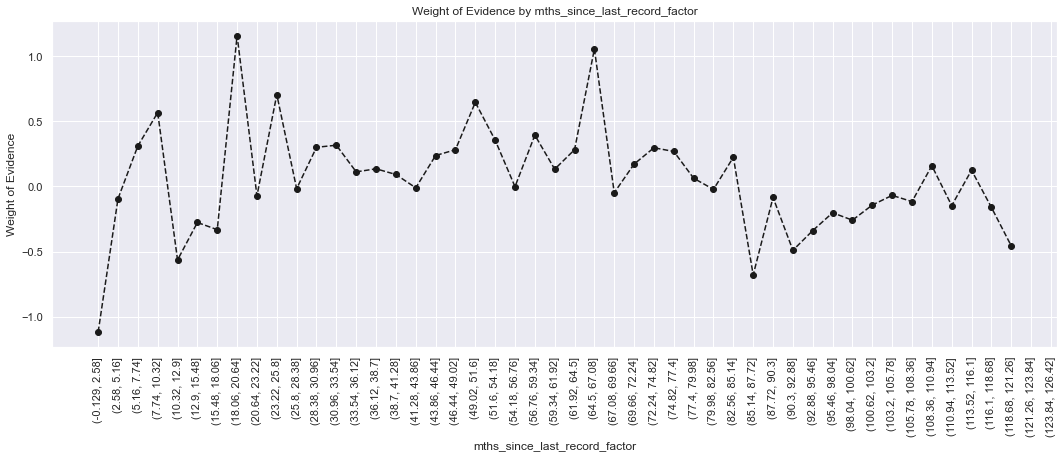

In [228]:
plot_by_woe(df_mths_since_last, 90)
# We plot the weight of evidence values.

In [229]:
# Categories: 'Missing', '0-2', '3-20', '21-31', '32-80', '81-86', '>86'
df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_record:0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
df_inputs_prepr['mths_since_last_record:3-20'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 3) & (df_inputs_prepr['mths_since_last_record'] <= 20), 1, 0)
df_inputs_prepr['mths_since_last_record:21-31'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 21) & (df_inputs_prepr['mths_since_last_record'] <= 31), 1, 0)
df_inputs_prepr['mths_since_last_record:32-80'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 32) & (df_inputs_prepr['mths_since_last_record'] <= 80), 1, 0)
df_inputs_prepr['mths_since_last_record:81-86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 81) & (df_inputs_prepr['mths_since_last_record'] <= 86), 1, 0)
df_inputs_prepr['mths_since_last_record:>86'] = np.where((df_inputs_prepr['mths_since_last_record'] > 86), 1, 0)

### Preprocessing the Test Dataset

### >>>>>>>> Follow Instruction Here >>>>>>>>>>

In [232]:
# save the old data
######################## BEFORE CHANGE MADE ###########################
# loan_data_inputs_train = df_inputs_prepr

############################################# NOW GO BACK TO >>>>>>>>>>>> above >>>>>>>>>>> ####################################
############################################ AND MAKE CHANGES TO THAT! #########################################################

######################## AFTER CHANGE MADE #############################
######################## Un-tag these lines below and tag above!! ######
loan_data_inputs_test = df_inputs_prepr


In [233]:
# Now train and test contain all dummies and all corresponding outputs.

In [231]:
# export and store the results into csv
loan_data_inputs_train.to_csv('loan_data_inputs_train.csv')
loan_data_targets_train.to_csv('loan_data_targets_train.csv')
loan_data_inputs_test.to_csv('loan_data_inputs_test.csv')
loan_data_targets_test.to_csv('loan_data_targets_test.csv')


In [246]:
import cowsay
cowsay.dragon('See you in the next file!')

  _________________________
| See you in the next file! |
                           \
                            \
                             \
                              \
                                                    / \\  //\\
                                     |\\___/|      /   \\//  \\\\
                                     /0  0  \\__  /    //  | \\ \\
                                    /     /  \\/_/    //   |  \\  \\
                                    \@_^_\@'/   \\/_   //    |   \\   \\
                                    //_^_/     \\/_ //     |    \\    \\
                                 ( //) |        \\///      |     \\     \\
                               ( / /) _|_ /   )  //       |      \\     _\\
                             ( // /) '/,_ _ _/  ( ; -.    |    _ _\\.-~        .-~~~^-.
                           (( / / )) ,-{        _      `-.|.-~-.           .~         `.
                          (( // / ))  '/\\      /                 ~-. _ .-~      